In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib as mpl


# Data Cleansing



In [404]:
df= pd.read_csv('https://api.covidtracking.com/v1/states/daily.csv',parse_dates=['date'])

upload census data that we will use with our covid data to determine values per thousand and hundred-thousand of each state's population

In [405]:
c=pd.read_csv('census2018.csv')

In [406]:
c.columns

Index(['Geographic Area Name', 'Estimate'], dtype='object')

In [407]:
c.columns= ['State','Population']

In [408]:
c['State']

0                 Colorado
1                  Indiana
2                 Kentucky
3                Louisiana
4                 Illinois
5                     Iowa
6            New Hampshire
7                 Arkansas
8                 Delaware
9                Minnesota
10                 Montana
11                   Maine
12          North Carolina
13                 Georgia
14                  Alaska
15                 Alabama
16                 Vermont
17                  Nevada
18           West Virginia
19                Oklahoma
20               Wisconsin
21             Puerto Rico
22                Virginia
23            North Dakota
24          South Carolina
25                  Oregon
26                 Wyoming
27              California
28             Mississippi
29             Connecticut
30                   Texas
31                Maryland
32                 Florida
33           Massachusetts
34    District of Columbia
35                    Utah
36                New York
3

below is a dictionary where every state has a value of its abbreviation.

In [409]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'American Samoa': 'AS',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Guam': 'GU',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

for every state in our census data, add its corresponding abbreviation, from the us_abbrev dictionary, to a list that will later be joined to the census data dataframe

In [410]:
state_list=[]
for s in c['State']:
    if s != 'United States':
        state_list.append(us_state_abbrev[s])

In [411]:
state_list

['CO',
 'IN',
 'KY',
 'LA',
 'IL',
 'IA',
 'NH',
 'AR',
 'DE',
 'MN',
 'MT',
 'ME',
 'NC',
 'GA',
 'AK',
 'AL',
 'VT',
 'NV',
 'WV',
 'OK',
 'WI',
 'PR',
 'VA',
 'ND',
 'SC',
 'OR',
 'WY',
 'CA',
 'MS',
 'CT',
 'TX',
 'MD',
 'FL',
 'MA',
 'DC',
 'UT',
 'NY',
 'NJ',
 'OH',
 'MO',
 'PA',
 'MI',
 'NE',
 'ID',
 'NM',
 'HI',
 'SD',
 'WA',
 'RI',
 'AZ',
 'TN',
 'KS']

In [412]:

state_list=np.array(state_list)

Add USA to end of list as it is not provided 

In [414]:
state_list=np.append(state_list,'USA')

In [417]:
state_list

array(['CO', 'IN', 'KY', 'LA', 'IL', 'IA', 'NH', 'AR', 'DE', 'MN', 'MT',
       'ME', 'NC', 'GA', 'AK', 'AL', 'VT', 'NV', 'WV', 'OK', 'WI', 'PR',
       'VA', 'ND', 'SC', 'OR', 'WY', 'CA', 'MS', 'CT', 'TX', 'MD', 'FL',
       'MA', 'DC', 'UT', 'NY', 'NJ', 'OH', 'MO', 'PA', 'MI', 'NE', 'ID',
       'NM', 'HI', 'SD', 'WA', 'RI', 'AZ', 'TN', 'KS', 'USA'], dtype='<U3')

In [418]:
c['state_code']=state_list

view the resulting c dataframe

In [419]:
c

,State,Population,state_code
0,Colorado,5695564,CO
1,Indiana,6691878,IN
2,Kentucky,4468402,KY
3,Louisiana,4659978,LA
4,Illinois,12741080,IL
5,Iowa,3156145,IA
6,New Hampshire,1356458,NH
7,Arkansas,3013825,AR
8,Delaware,967171,DE
9,Minnesota,5611179,MN


In [420]:
c.set_index('state_code')

,State,Population
state_code,,
CO,Colorado,5695564
IN,Indiana,6691878
KY,Kentucky,4468402
LA,Louisiana,4659978
IL,Illinois,12741080
IA,Iowa,3156145
NH,New Hampshire,1356458
AR,Arkansas,3013825
DE,Delaware,967171


In [421]:
c.set_index('state_code')

,State,Population
state_code,,
CO,Colorado,5695564
IN,Indiana,6691878
KY,Kentucky,4468402
LA,Louisiana,4659978
IL,Illinois,12741080
IA,Iowa,3156145
NH,New Hampshire,1356458
AR,Arkansas,3013825
DE,Delaware,967171


drop the full name of the state and turn this into a dictionary where the state abbreviation key has a value of the population

In [422]:
c=c.drop(columns='State')
c=c.set_index('state_code')
c=c.to_dict()

because there are some missing values, manually add in each missing value with their population based on 2018 census

In [423]:
c['Population']['AS']=55465 
c['Population']['GU']=165768
c['Population']['MP']=56882
c['Population']['VI']=106977

In [424]:
c

{'Population': {'CO': 5695564,
  'IN': 6691878,
  'KY': 4468402,
  'LA': 4659978,
  'IL': 12741080,
  'IA': 3156145,
  'NH': 1356458,
  'AR': 3013825,
  'DE': 967171,
  'MN': 5611179,
  'MT': 1062305,
  'ME': 1338404,
  'NC': 10383620,
  'GA': 10519475,
  'AK': 737438,
  'AL': 4887871,
  'VT': 626299,
  'NV': 3034392,
  'WV': 1805832,
  'OK': 3943079,
  'WI': 5813568,
  'PR': 3195153,
  'VA': 8517685,
  'ND': 760077,
  'SC': 5084127,
  'OR': 4190713,
  'WY': 577737,
  'CA': 39557045,
  'MS': 2986530,
  'CT': 3572665,
  'TX': 28701845,
  'MD': 6042718,
  'FL': 21299325,
  'MA': 6902149,
  'DC': 702455,
  'UT': 3161105,
  'NY': 19542209,
  'NJ': 8908520,
  'OH': 11689442,
  'MO': 6126452,
  'PA': 12807060,
  'MI': 9995915,
  'NE': 1929268,
  'ID': 1754208,
  'NM': 2095428,
  'HI': 1420491,
  'SD': 882235,
  'WA': 7535591,
  'RI': 1057315,
  'AZ': 7171646,
  'TN': 6770010,
  'KS': 2911510,
  'USA': 327167439,
  'AS': 55465,
  'GU': 165768,
  'MP': 56882,
  'VI': 106977}}

We now make a list of the state's population in order of how the states are listed in the covid dataframe.

In [435]:


statelist=[]
for s in df['state']:
    if s in c['Population'].keys():
        statelist.append(c['Population'][s])
    else:
        statelist.append(0)

In [436]:
statelist=np.array(statelist)

put these populations in a new column of the covid data 

In [437]:
df['state_pop']=statelist

We convert columns to be used to the type "float" in order to do calculations 

In [438]:
df['positive']=df['positive'].astype(float)
df['death']=df['death'].astype(float)
df['totalTestResults']=df['totalTestResults'].astype(float)

We make new columns that shows covid data relative to the state population in thousands or hundred thousands.

The new values are : death per hundred thousand of state population,  death increase today per hundred thousand,
tests per thousand of state population, positive cases per thousand, increase in positive cases per thousand, and test increase per thousand.

These new values make comparing covid data for different size states possible rather than only comparing  numbers.


In [439]:

df['death per hundred thous']=df['death']/(df['state_pop'].astype(int)/100000)
df['death increase per hun thousand']=df['deathIncrease']/(df['state_pop'].astype(int)/100000)
df['positive per thousand']=df['positive']/(df['state_pop'].astype(int)/1000)
df['positive increase per thousand']=df['positiveIncrease']/(df['state_pop'].astype(int)/1000)
df['tests per thousand']=df['totalTestResults']/(df['state_pop'].astype(int)/1000)
df['test increase per thousand']=df['totalTestResultsIncrease']/(df['state_pop'].astype(int)/1000)


we also want to know the average positive increase per day based on the past week.

first we must create a dataframe of data from the past week.

In [440]:
past_sev_days = df[df['date'] > dt.datetime.today()-dt.timedelta(days=7)]

In [441]:
past_sev_days

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,positiveScore,score,grade,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand
0,2020-09-02,AK,6233.0,370651.0,NaN,46.0,NaN,NaN,NaN,10.0,...,0,0,NaN,737438,5.288580,0.000000,8.452236,0.098991,511.072117,3.565045
1,2020-09-02,AL,128239.0,835994.0,NaN,959.0,14753.0,NaN,1501.0,NaN,...,0,0,NaN,4887871,45.357171,0.347800,26.236167,0.127458,197.270550,1.086976
2,2020-09-02,AR,62112.0,675337.0,NaN,435.0,4341.0,NaN,NaN,90.0,...,0,0,NaN,3013825,27.904739,0.895872,20.609027,0.204060,244.688726,2.131511
3,2020-09-02,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,NaN,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000
4,2020-09-02,AZ,202861.0,1011066.0,NaN,752.0,21449.0,248.0,NaN,146.0,...,0,0,NaN,7171646,70.625349,0.292820,28.286533,0.072368,169.267557,0.688405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020-08-27,VT,1586.0,123245.0,NaN,12.0,NaN,NaN,NaN,NaN,...,0,0,NaN,626299,9.260752,0.000000,2.532337,0.014370,199.315343,3.177396
388,2020-08-27,WA,72161.0,1319148.0,NaN,351.0,6640.0,NaN,NaN,37.0,...,0,0,NaN,7535591,24.948275,0.053081,9.576024,0.060513,184.631703,1.486944
389,2020-08-27,WI,78004.0,1148494.0,124.0,291.0,5684.0,96.0,1004.0,NaN,...,0,0,NaN,5813568,19.248076,0.189213,13.417578,0.156874,210.971644,1.862023
390,2020-08-27,WV,9633.0,404176.0,NaN,146.0,NaN,47.0,NaN,25.0,...,0,0,NaN,1805832,11.019851,0.498385,5.334383,0.051500,229.151438,2.328013


Now we attain the mean positive increase in cases per state from this past week's data.

In [442]:
avg_sev_inc = past_sev_days.groupby(['state']).mean()['positiveIncrease']

Convert this to a dictionary which we will later when we look up values in the order of states listed in our data frame, to make a list of mean positive increases in the order of their corresponding states.

In [443]:
avg_sev_inc=avg_sev_inc.to_dict()

In [444]:
avg_sev_inc

{'AK': 73.42857142857143,
 'AL': 1283.5714285714287,
 'AR': 584.1428571428571,
 'AS': 0.0,
 'AZ': 486.0,
 'CA': 4707.571428571428,
 'CO': 282.14285714285717,
 'CT': 126.85714285714286,
 'DC': 50.714285714285715,
 'DE': 80.42857142857143,
 'FL': 3531.4285714285716,
 'GA': 2003.2857142857142,
 'GU': 53.42857142857143,
 'HI': 238.42857142857142,
 'IA': 915.7142857142857,
 'ID': 270.42857142857144,
 'IL': 1900.142857142857,
 'IN': 913.0,
 'KS': 571.8571428571429,
 'KY': 680.1428571428571,
 'LA': 696.8571428571429,
 'MA': -803.5714285714286,
 'MD': 547.5714285714286,
 'ME': 25.428571428571427,
 'MI': 712.5714285714286,
 'MN': 835.5714285714286,
 'MO': 1307.2857142857142,
 'MP': 0.42857142857142855,
 'MS': 607.8571428571429,
 'MT': 129.42857142857142,
 'NC': 1652.5714285714287,
 'ND': 257.14285714285717,
 'NE': 318.0,
 'NH': 19.714285714285715,
 'NJ': 327.0,
 'NM': 132.14285714285714,
 'NV': 458.0,
 'NY': 696.8571428571429,
 'OH': 1169.0,
 'OK': 754.2857142857143,
 'OR': 214.85714285714286,


We construct a list of average daily positive increases from the past 7 days, in the order of the states listed in the past_sev_days  dataframe.

In [445]:
avg_sev_list=[]
for s in past_sev_days['state']:
    avg_sev_list.append(avg_sev_inc[s])

In [446]:
avg_sev_list

[73.42857142857143,
 1283.5714285714287,
 584.1428571428571,
 0.0,
 486.0,
 4707.571428571428,
 282.14285714285717,
 126.85714285714286,
 50.714285714285715,
 80.42857142857143,
 3531.4285714285716,
 2003.2857142857142,
 53.42857142857143,
 238.42857142857142,
 915.7142857142857,
 270.42857142857144,
 1900.142857142857,
 913.0,
 571.8571428571429,
 680.1428571428571,
 696.8571428571429,
 -803.5714285714286,
 547.5714285714286,
 25.428571428571427,
 712.5714285714286,
 835.5714285714286,
 1307.2857142857142,
 0.42857142857142855,
 607.8571428571429,
 129.42857142857142,
 1652.5714285714287,
 257.14285714285717,
 318.0,
 19.714285714285715,
 327.0,
 132.14285714285714,
 458.0,
 696.8571428571429,
 1169.0,
 754.2857142857143,
 214.85714285714286,
 725.0,
 465.57142857142856,
 89.14285714285714,
 915.7142857142857,
 307.42857142857144,
 1496.857142857143,
 4218.571428571428,
 378.2857142857143,
 1012.0,
 16.142857142857142,
 8.571428571428571,
 462.0,
 727.1428571428571,
 157.4285714285714

add this ordered list of avg 7 day increase as a column in the dataframe of this past week's covid data.


In [447]:
past_sev_days['avg 7 day increase']=avg_sev_list
past_sev_days['avg 7 day increase per thousand']=avg_sev_list/(past_sev_days['state_pop'].astype(int)/1000)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [448]:
past_sev_days

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,grade,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand,avg 7 day increase,avg 7 day increase per thousand
0,2020-09-02,AK,6233.0,370651.0,NaN,46.0,NaN,NaN,NaN,10.0,...,NaN,737438,5.288580,0.000000,8.452236,0.098991,511.072117,3.565045,73.428571,0.099573
1,2020-09-02,AL,128239.0,835994.0,NaN,959.0,14753.0,NaN,1501.0,NaN,...,NaN,4887871,45.357171,0.347800,26.236167,0.127458,197.270550,1.086976,1283.571429,0.262603
2,2020-09-02,AR,62112.0,675337.0,NaN,435.0,4341.0,NaN,NaN,90.0,...,NaN,3013825,27.904739,0.895872,20.609027,0.204060,244.688726,2.131511,584.142857,0.193821
3,2020-09-02,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000,0.000000,0.000000
4,2020-09-02,AZ,202861.0,1011066.0,NaN,752.0,21449.0,248.0,NaN,146.0,...,NaN,7171646,70.625349,0.292820,28.286533,0.072368,169.267557,0.688405,486.000000,0.067767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,2020-08-27,VT,1586.0,123245.0,NaN,12.0,NaN,NaN,NaN,NaN,...,NaN,626299,9.260752,0.000000,2.532337,0.014370,199.315343,3.177396,8.571429,0.013686
388,2020-08-27,WA,72161.0,1319148.0,NaN,351.0,6640.0,NaN,NaN,37.0,...,NaN,7535591,24.948275,0.053081,9.576024,0.060513,184.631703,1.486944,462.000000,0.061309
389,2020-08-27,WI,78004.0,1148494.0,124.0,291.0,5684.0,96.0,1004.0,NaN,...,NaN,5813568,19.248076,0.189213,13.417578,0.156874,210.971644,1.862023,727.142857,0.125077
390,2020-08-27,WV,9633.0,404176.0,NaN,146.0,NaN,47.0,NaN,25.0,...,NaN,1805832,11.019851,0.498385,5.334383,0.051500,229.151438,2.328013,157.428571,0.087178


create a dataframe of today's data, which we will use in our choropleth.

In [449]:

today =past_sev_days[past_sev_days['date']==past_sev_days['date'].max()]

In [450]:
today

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,grade,state_pop,death per hundred thous,death increase per hun thousand,positive per thousand,positive increase per thousand,tests per thousand,test increase per thousand,avg 7 day increase,avg 7 day increase per thousand
0,2020-09-02,AK,6233.0,370651.0,NaN,46.0,NaN,NaN,NaN,10.0,...,NaN,737438,5.288580,0.000000,8.452236,0.098991,511.072117,3.565045,73.428571,0.099573
1,2020-09-02,AL,128239.0,835994.0,NaN,959.0,14753.0,NaN,1501.0,NaN,...,NaN,4887871,45.357171,0.347800,26.236167,0.127458,197.270550,1.086976,1283.571429,0.262603
2,2020-09-02,AR,62112.0,675337.0,NaN,435.0,4341.0,NaN,NaN,90.0,...,NaN,3013825,27.904739,0.895872,20.609027,0.204060,244.688726,2.131511,584.142857,0.193821
3,2020-09-02,AS,0.0,1514.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,55465,0.000000,0.000000,0.000000,0.000000,27.296493,0.000000,0.000000,0.000000
4,2020-09-02,AZ,202861.0,1011066.0,NaN,752.0,21449.0,248.0,NaN,146.0,...,NaN,7171646,70.625349,0.292820,28.286533,0.072368,169.267557,0.688405,486.000000,0.067767
5,2020-09-02,CA,712052.0,10868318.0,NaN,4851.0,NaN,1339.0,NaN,NaN,...,NaN,39557045,33.275994,0.366559,18.000637,0.107566,292.751140,2.772553,4707.571429,0.119007
6,2020-09-02,CO,57775.0,660623.0,NaN,236.0,7053.0,NaN,NaN,NaN,...,NaN,5695564,32.534091,0.070230,10.143859,0.061627,178.146010,0.820288,282.142857,0.049537
7,2020-09-02,CT,53108.0,1150871.0,NaN,65.0,11180.0,NaN,NaN,NaN,...,NaN,3572665,125.032714,0.027990,14.865094,0.028550,336.997451,3.258352,126.857143,0.035508
8,2020-09-02,DC,14077.0,280720.0,NaN,73.0,NaN,22.0,NaN,8.0,...,NaN,702455,86.553587,0.142358,20.039718,0.039860,419.666740,2.780249,50.714286,0.072196
9,2020-09-02,DE,17549.0,222981.0,NaN,62.0,NaN,9.0,NaN,NaN,...,NaN,967171,62.656966,0.103394,18.144671,0.014475,248.694388,2.178519,80.428571,0.083159


# Insights


Get descriptive statistics of all the new columns we created.
We show the states with the maximum and minumum value of each of our new column
We use the inverted version of our previous state dictionary to look up state names from state abbreviations.

In [473]:

inverted_state_dict = dict(map(reversed,us_state_abbrev.items()))


filtered=['death per hundred thous', 'tests per thousand',
       'positive per thousand', 'positive increase per thousand',
       'test increase per thousand', 'death increase per hun thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']
for f in filtered:
    max_state=today[today[f]==today[f].max()].iloc[0,1]
    min_state=today[today[f]==today[f].min()].iloc[0,1]
    print(f)
    print('max: '+ inverted_state_dict[max_state] + ' '+max_state)
    print('min: '+ inverted_state_dict[min_state]+ ' '+ min_state)
    print(today[f].describe())
    print('\n')

death per hundred thous
max: New Jersey NJ
min: American Samoa AS
count     56.000000
mean      42.167494
std       37.661676
min        0.000000
25%       15.303428
50%       31.426864
75%       56.370422
max      178.896158
Name: death per hundred thous, dtype: float64


tests per thousand
max: Alaska AK
min: American Samoa AS
count     56.000000
mean     230.764090
std       94.053160
min       27.296493
25%      174.769925
50%      208.276584
75%      250.693051
max      511.072117
Name: tests per thousand, dtype: float64


positive per thousand
max: Louisiana LA
min: American Samoa AS
count    56.000000
mean     15.294313
std       7.464565
min       0.000000
25%      10.477542
50%      15.169143
75%      20.513956
max      32.154229
Name: positive per thousand, dtype: float64


positive increase per thousand
max: Kansas KS
min: Massachusetts MA
count    56.000000
mean      0.100407
std       0.190665
min      -1.123853
25%       0.048741
50%       0.108148
75%       0.173589
max 

We make a boxplot for every new column to better visualize the descriptive stats data.
We graph them individually  and then side by side

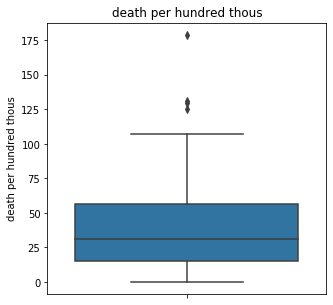

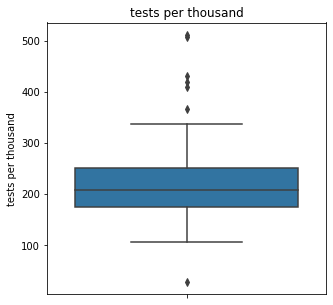

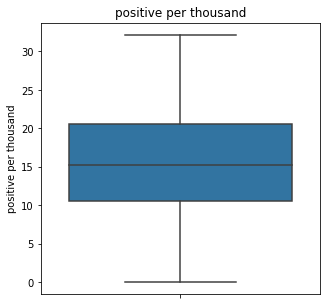

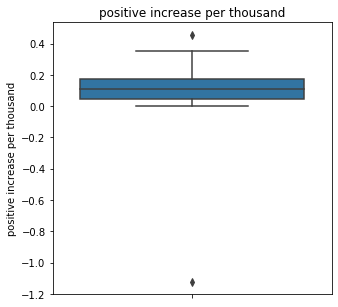

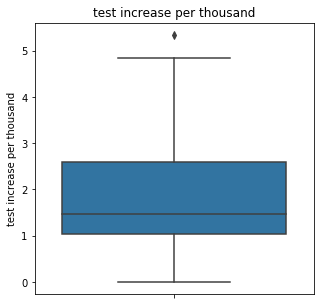

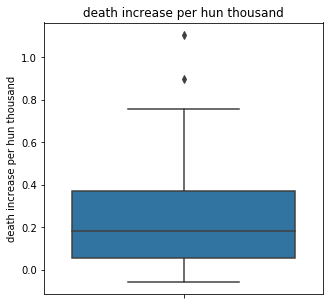

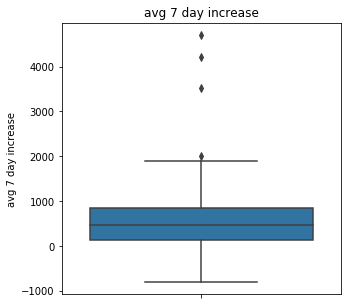

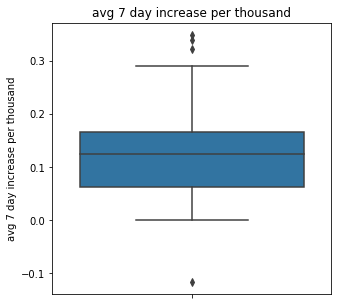

In [480]:
var=[ 'death per hundred thous', 'tests per thousand',
       'positive per thousand', 'positive increase per thousand',
       'test increase per thousand', 'death increase per hun thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']
counter=1
mpl.rcParams['figure.figsize'] = (5,5)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for v in var:
    sns.boxplot(y=v,data=today)
    plt.title(v)
    plt.show()

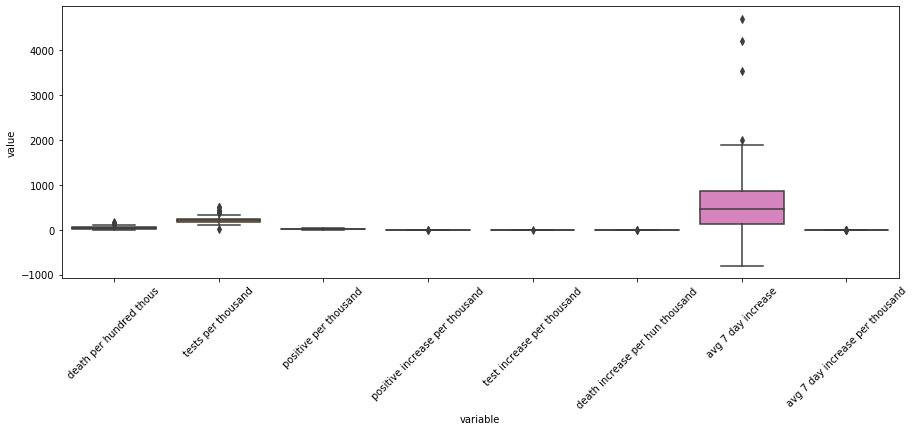

In [481]:
mpl.rcParams['figure.figsize'] = (15,5)

s=today[var].stack()
s=s.reset_index()
s.columns=['state_group','variable','value']
plt.xticks(rotation=45)
sns.boxplot(x='variable',y='value',data=s)

We make a bargraph for each of our new columns to show every state's value. This makes viewing states relative to others more easy

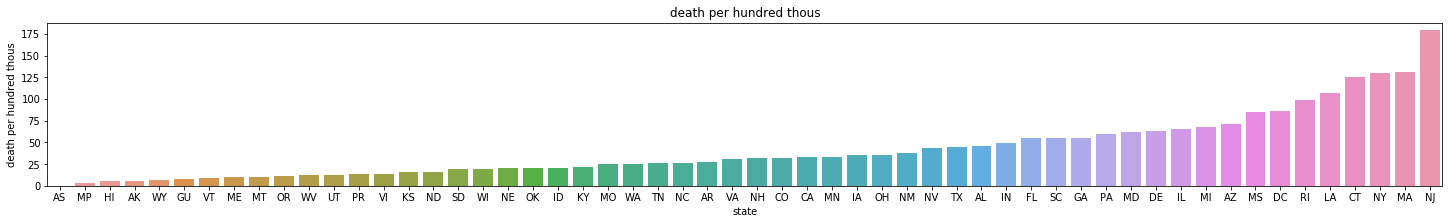

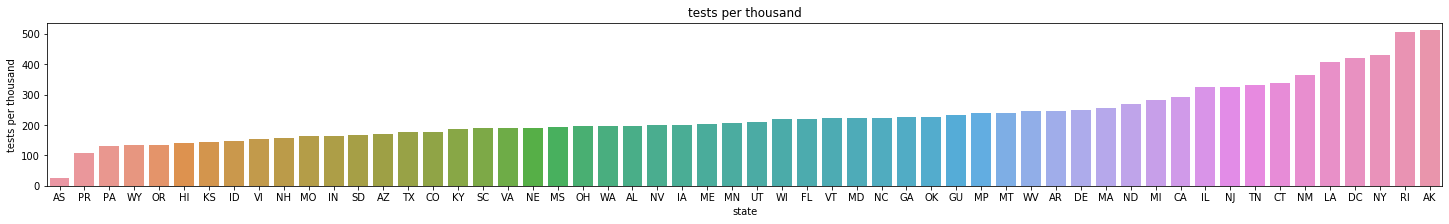

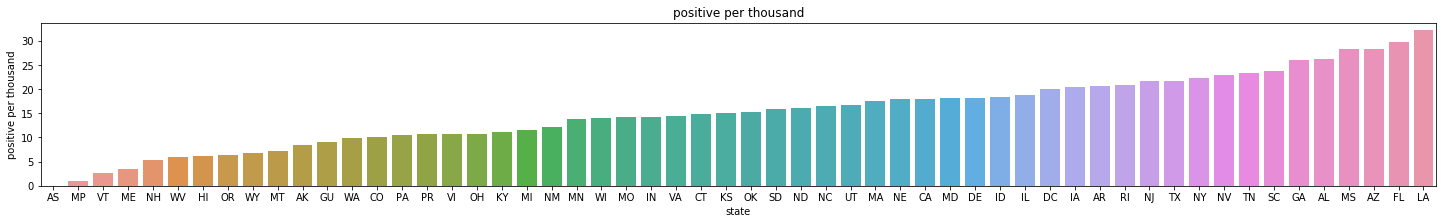

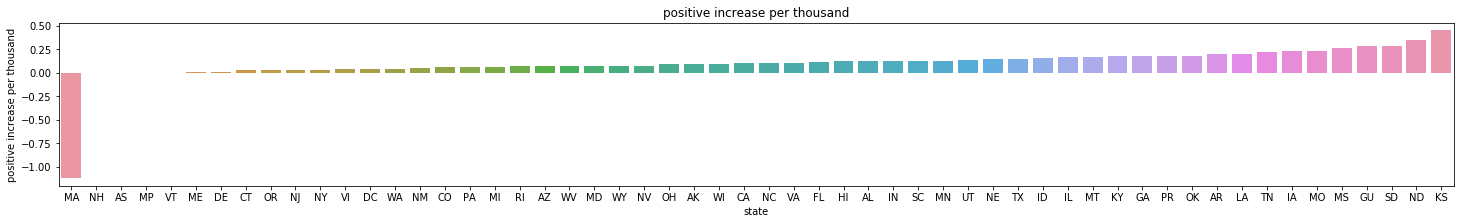

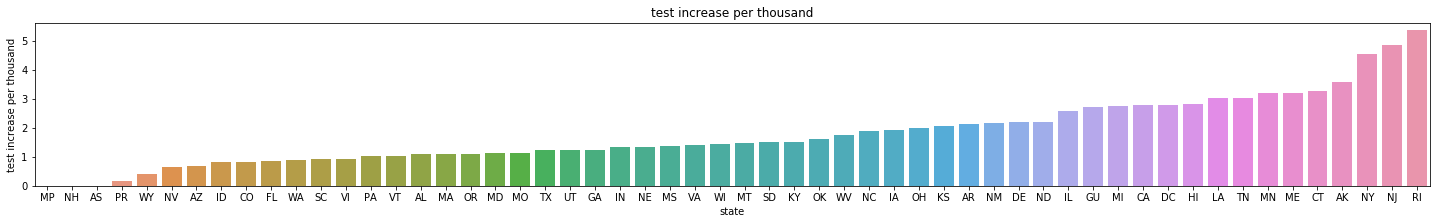

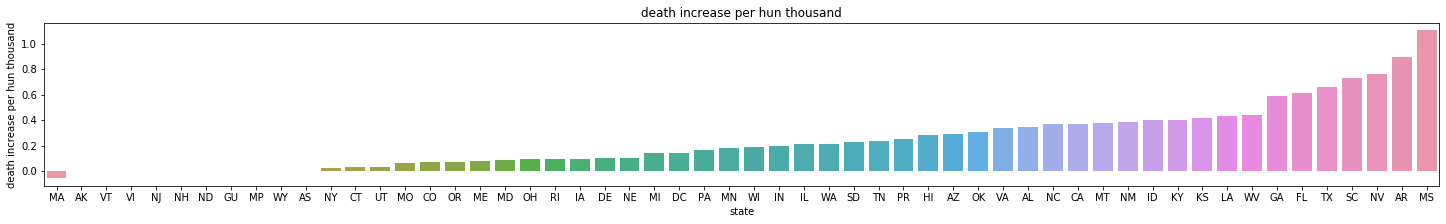

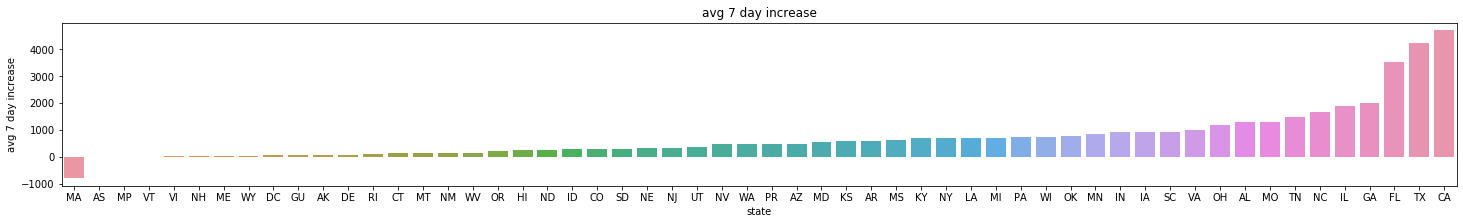

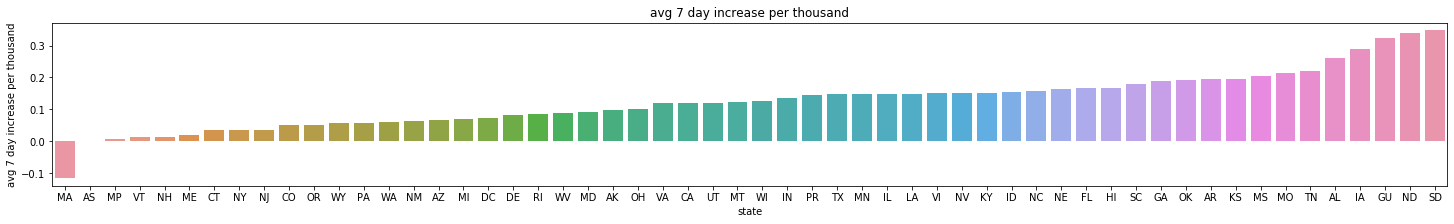

In [477]:
filt=['state','state_pop', 'death per hundred thous', 'tests per thousand',
       'positive per thousand', 'positive increase per thousand',
       'test increase per thousand', 'death increase per hun thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']  

for v in var:
    fig, ax = plt.subplots(figsize=(25,3))
    ax=sns.barplot(x='state',y=v,data=today[filt].sort_values(v))
    plt.xticks(rotation=0)
    plt.title(v)

We graph the past week's positive daily increase per each state

Group the data by state, then graph the positive increase per day for each state

In [482]:
past_week_groups = past_sev_days.groupby('state')

In [483]:
past_week_groups.groups.keys()

dict_keys(['AK', 'AL', 'AR', 'AS', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MP', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY'])

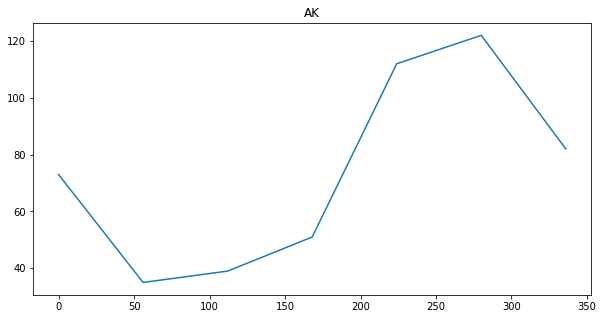

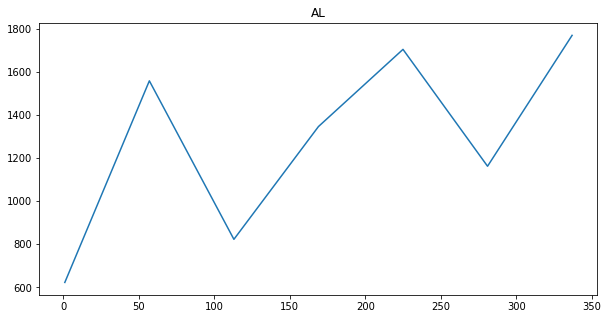

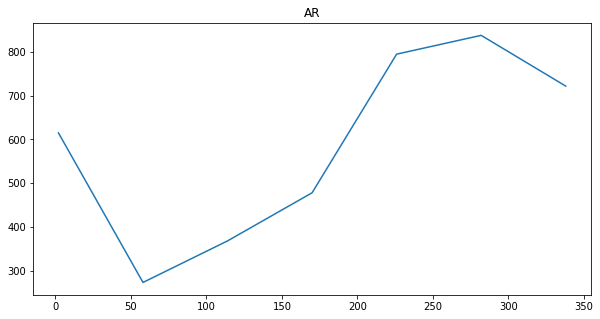

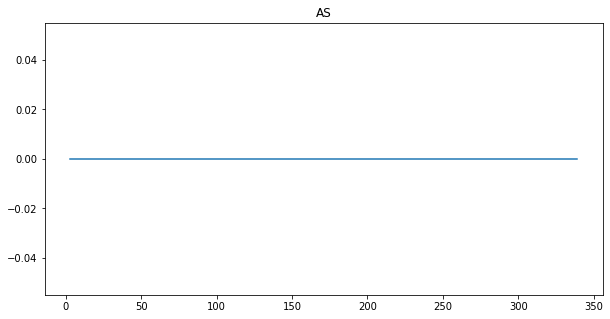

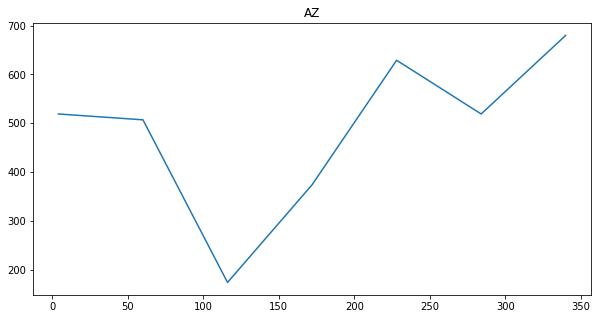

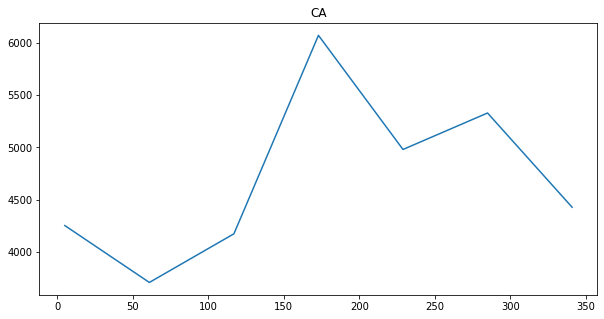

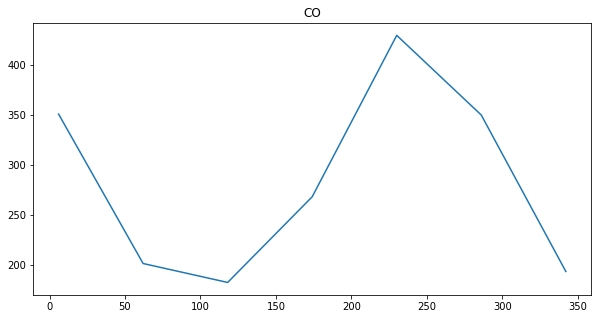

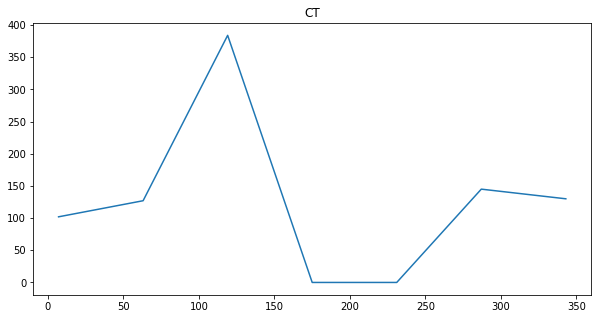

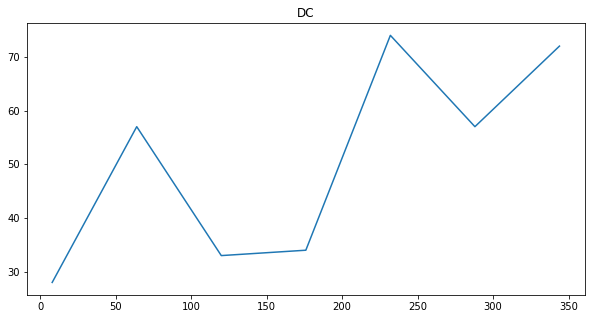

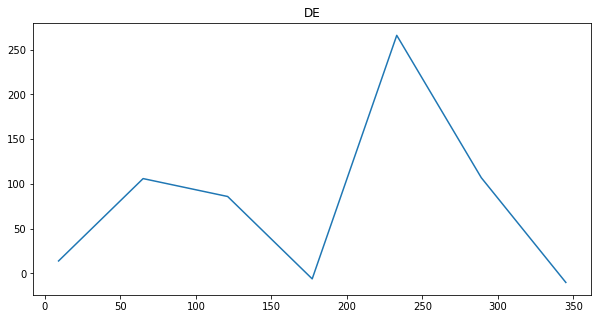

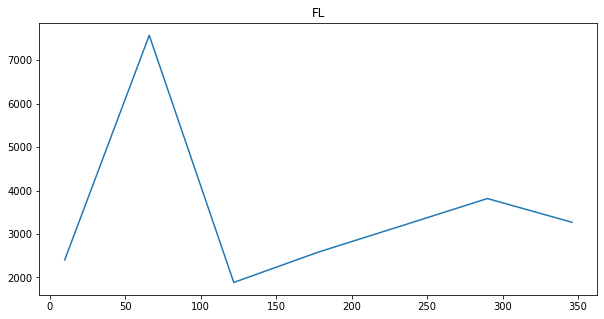

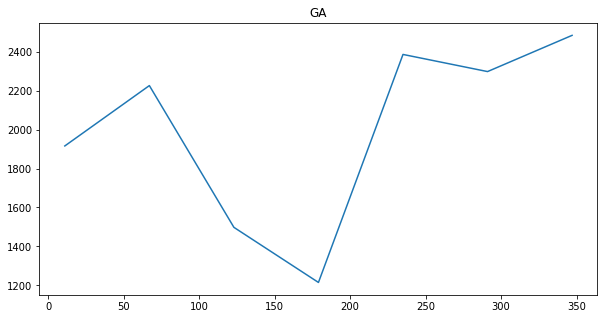

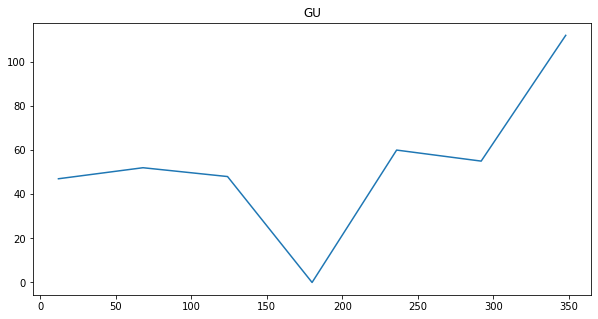

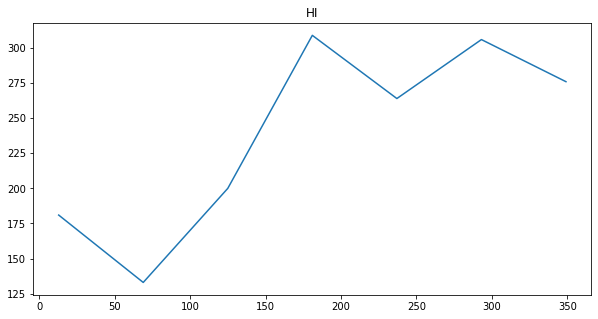

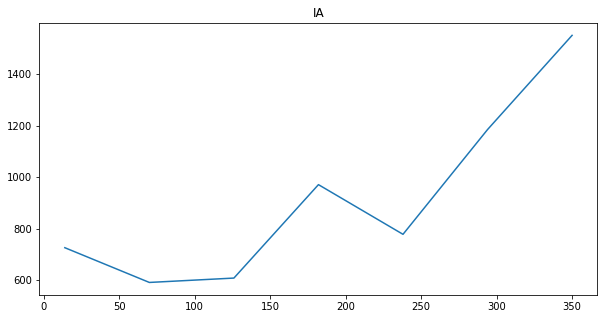

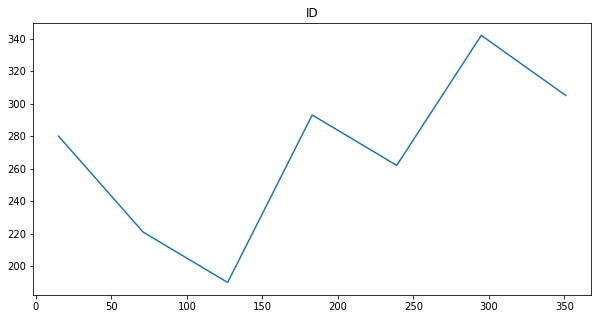

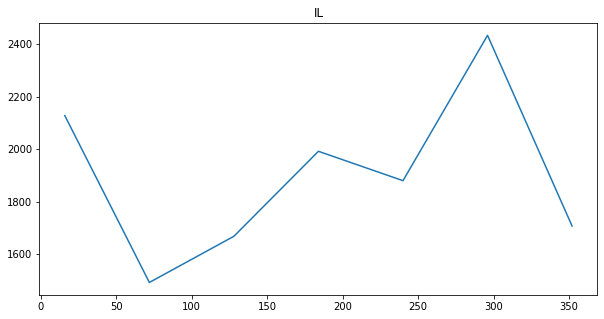

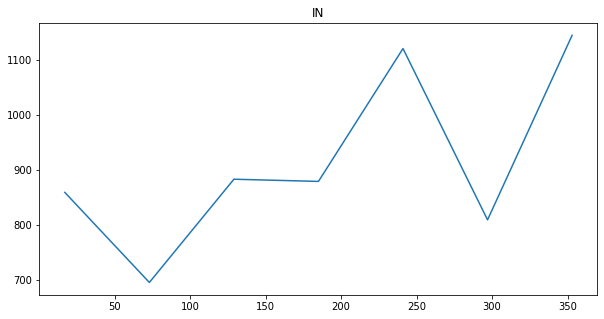

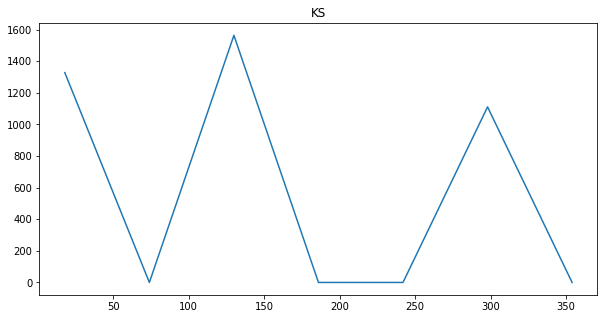

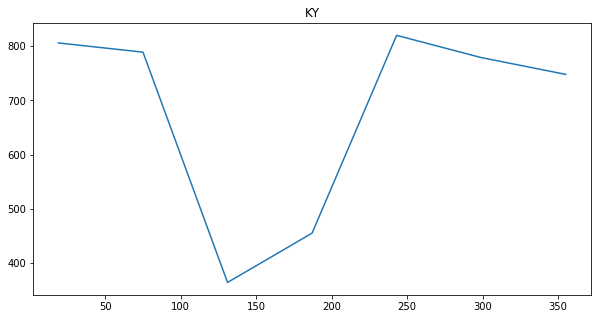

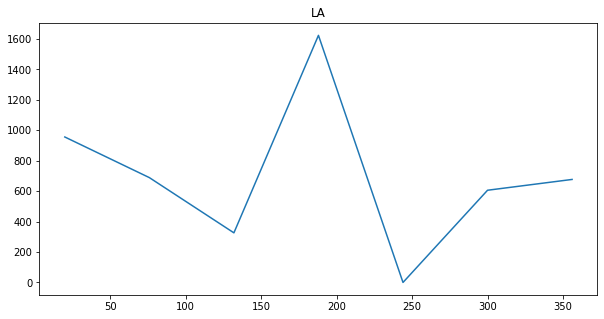

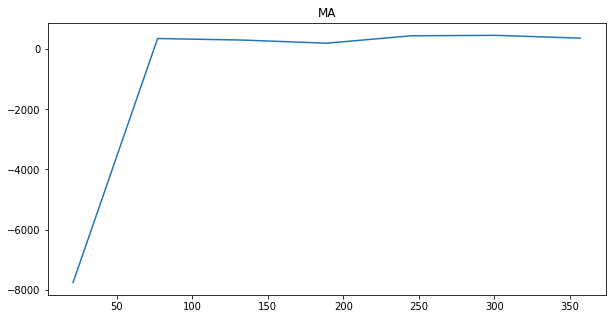

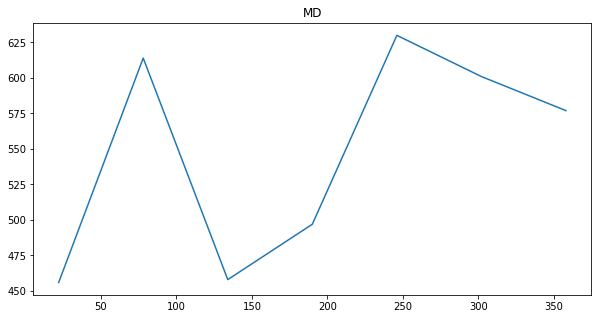

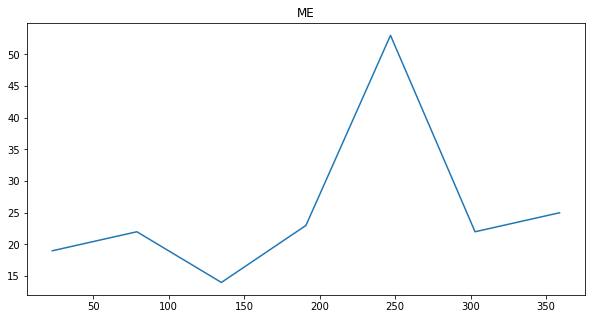

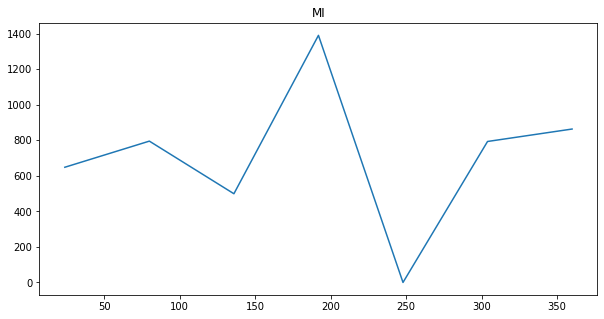

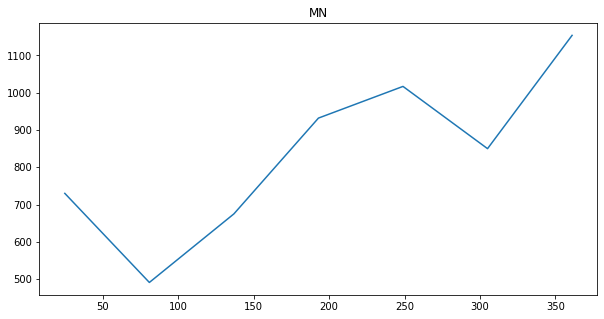

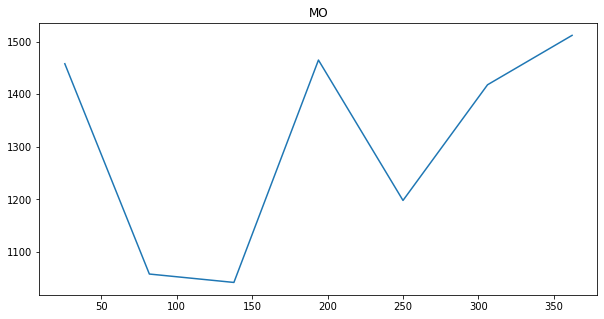

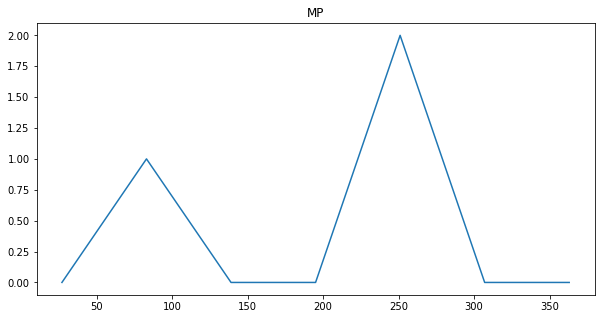

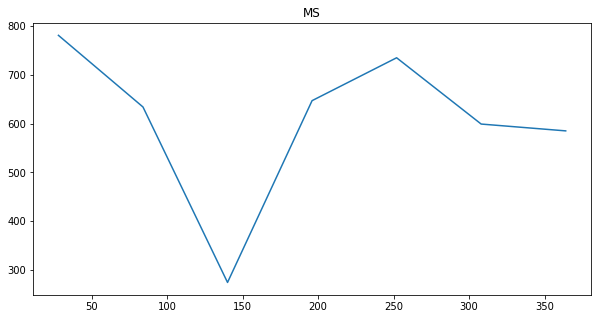

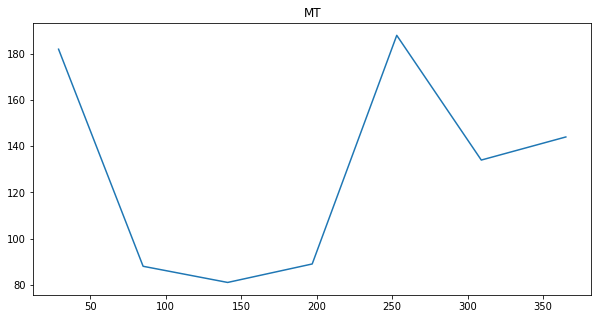

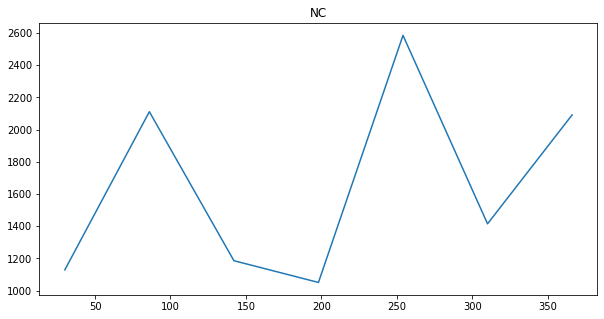

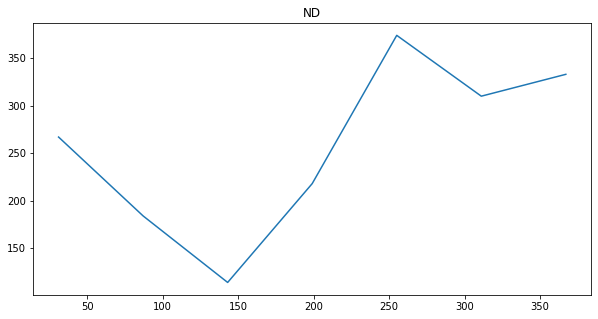

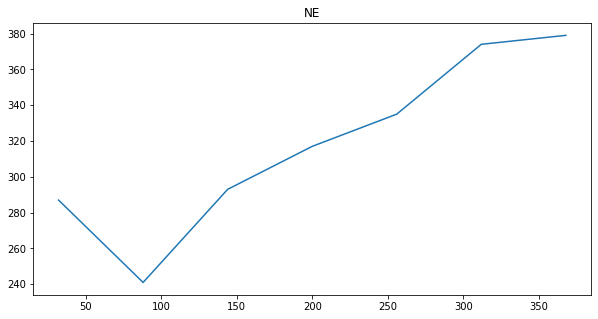

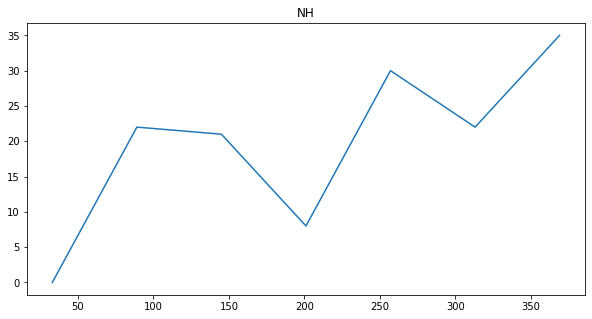

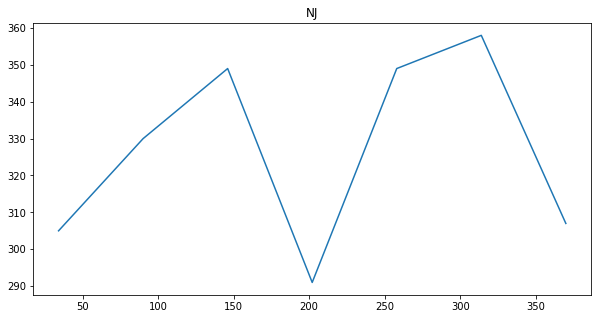

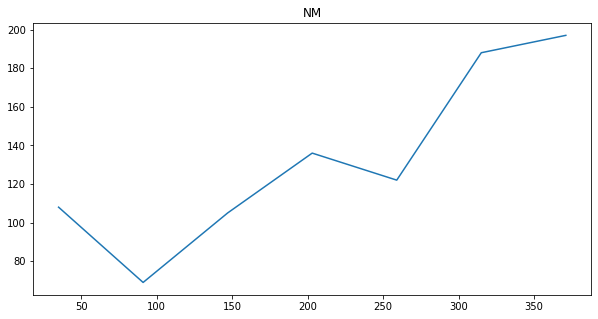

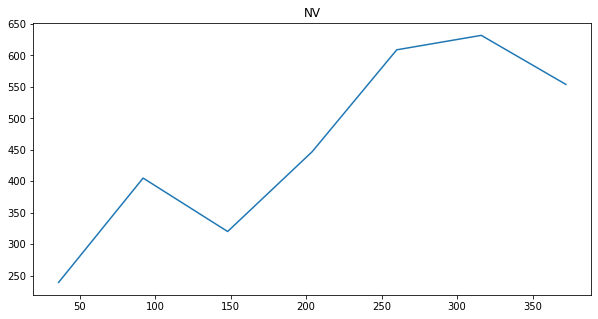

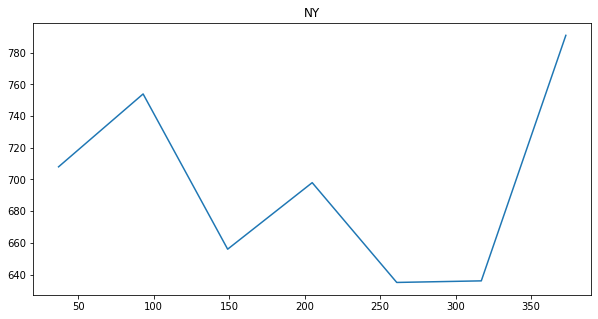

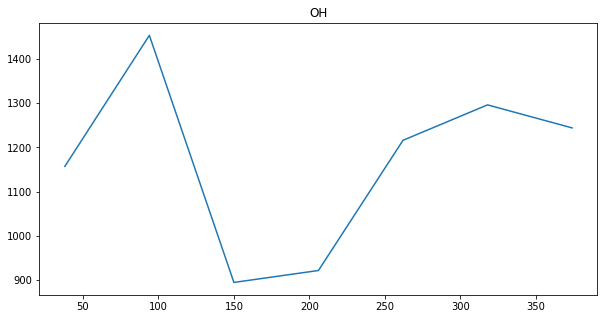

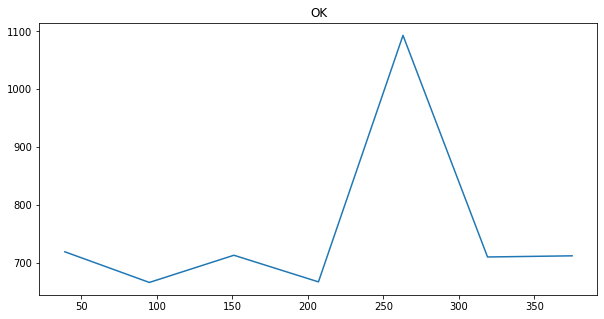

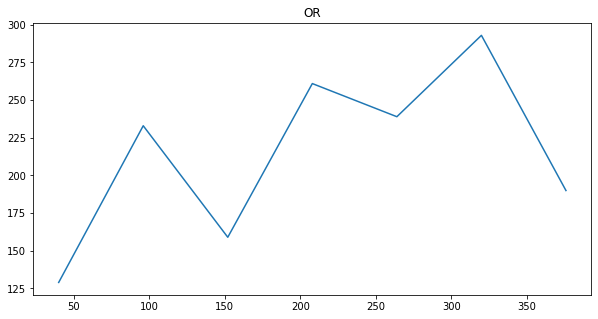

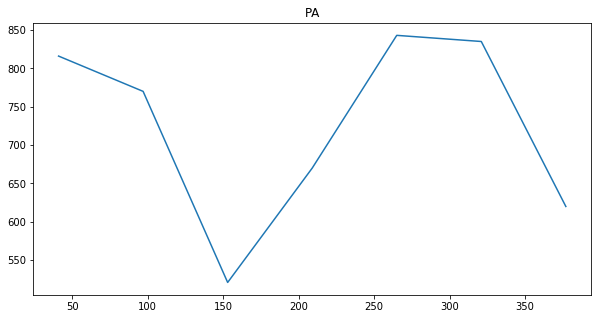

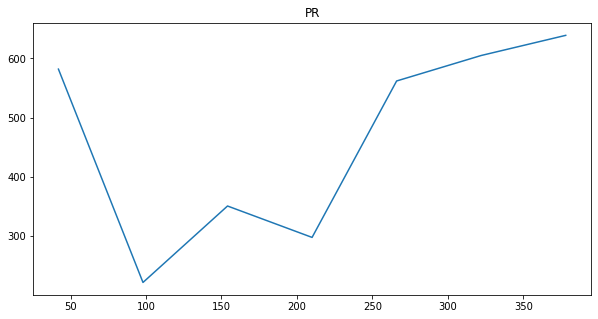

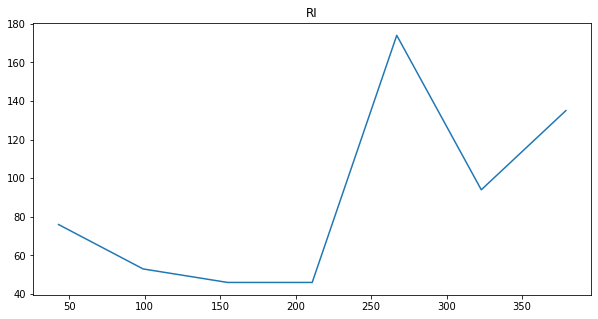

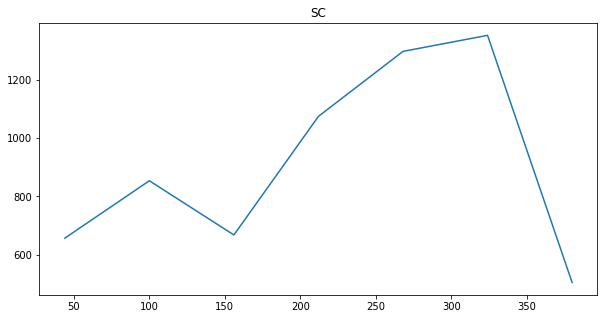

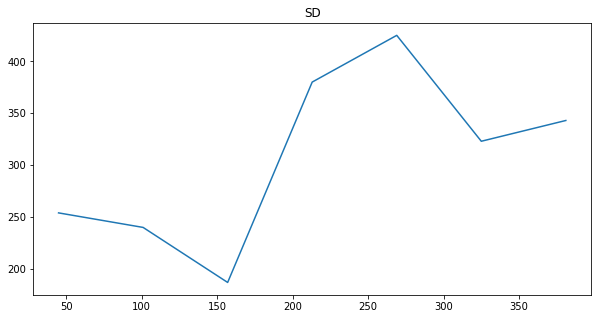

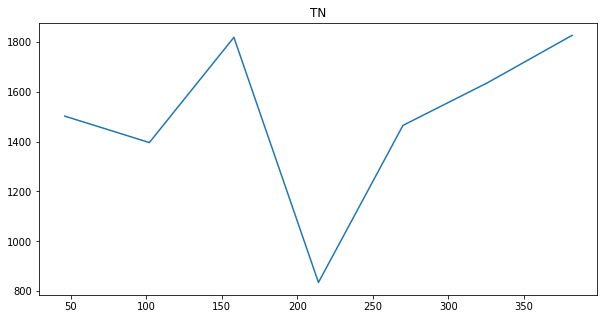

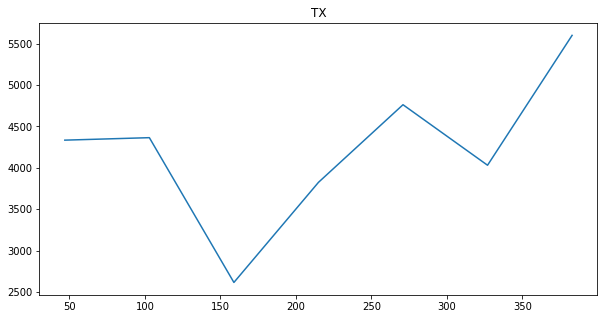

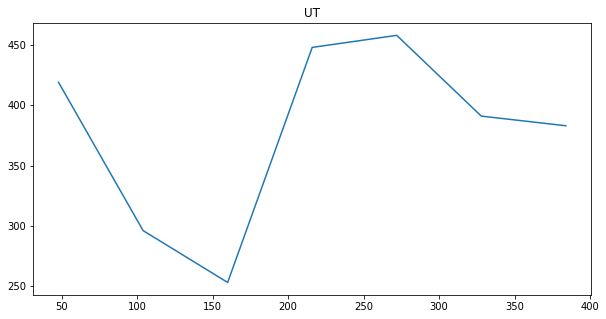

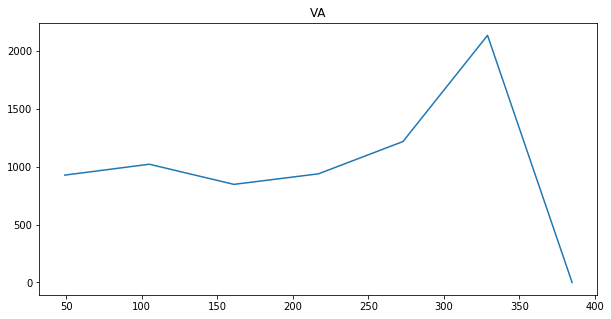

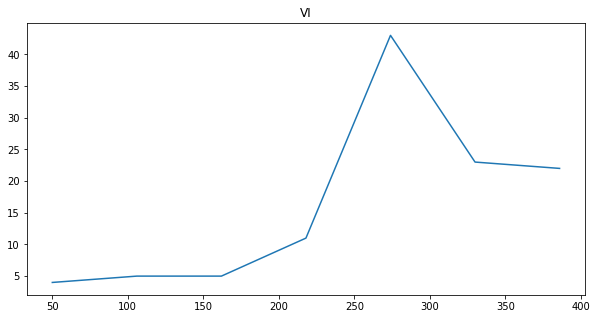

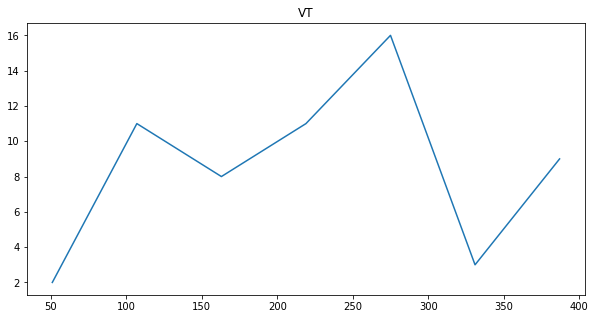

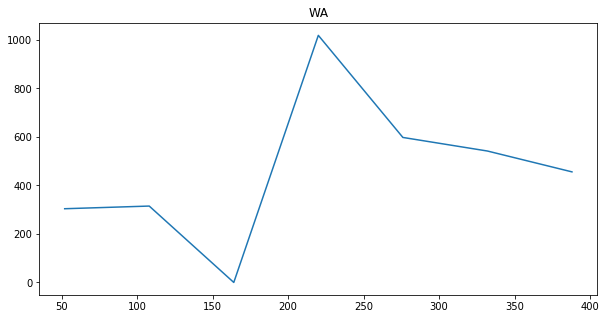

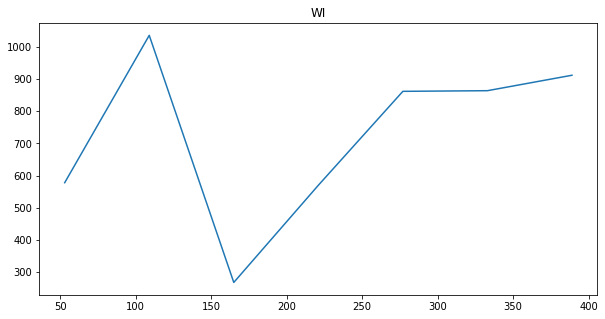

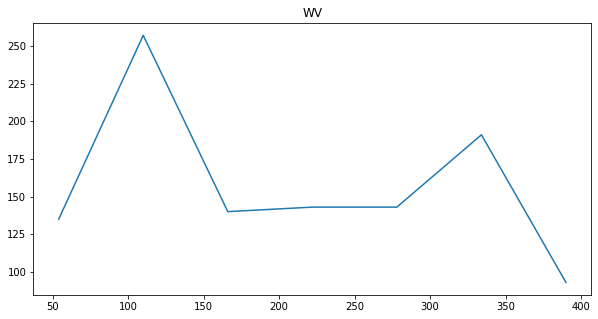

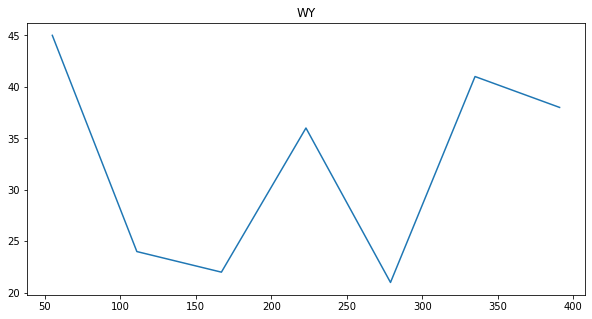

In [484]:
mpl.rcParams['figure.figsize'] = (10,5)
for g in past_week_groups.groups.keys():
    plt.plot(past_week_groups.get_group(g)['positiveIncrease'])
    plt.title(g)
    plt.show()

graph the daily increase in testing for the past week per state

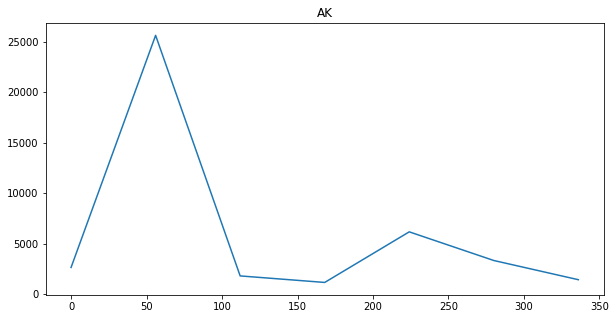

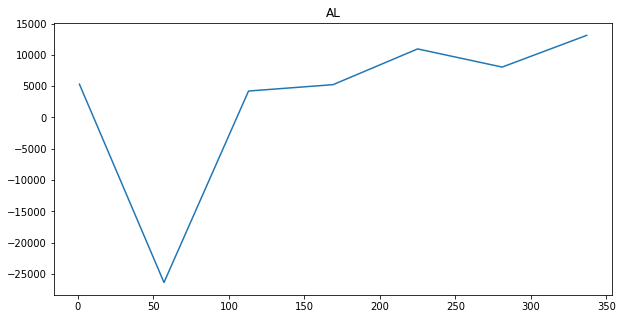

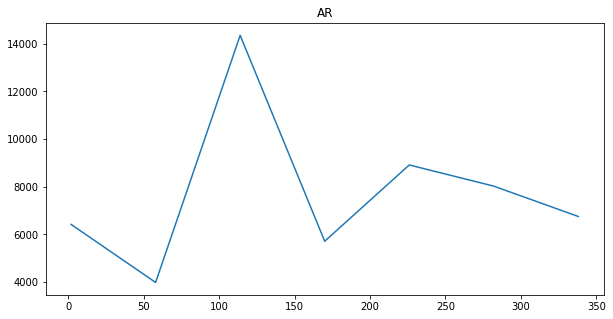

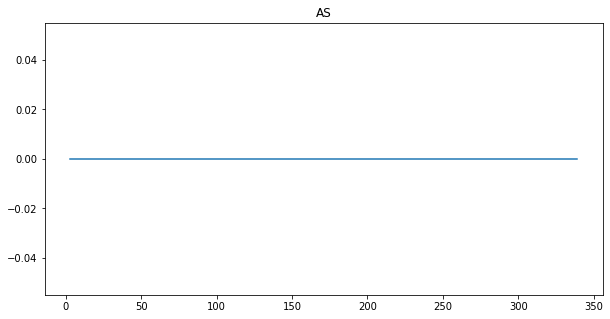

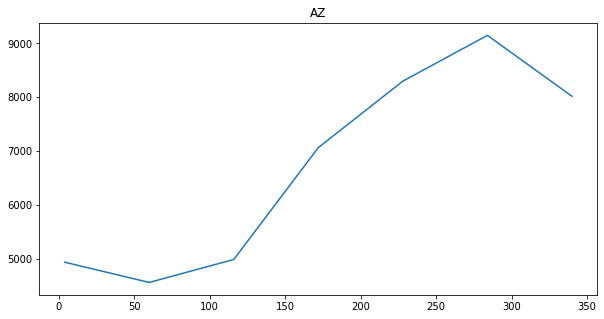

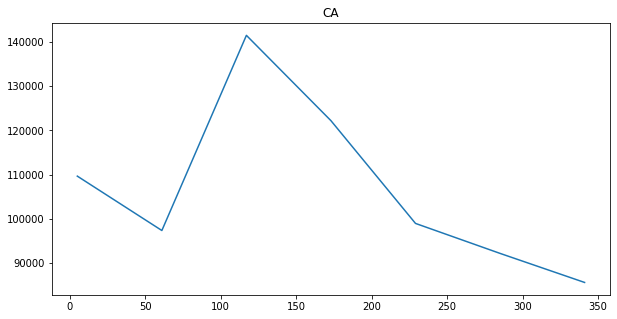

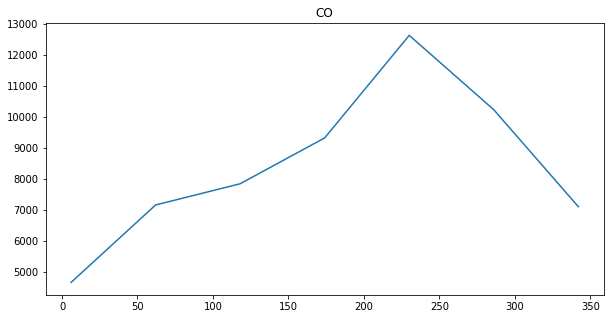

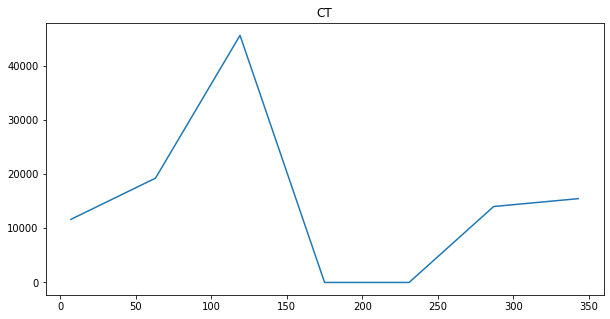

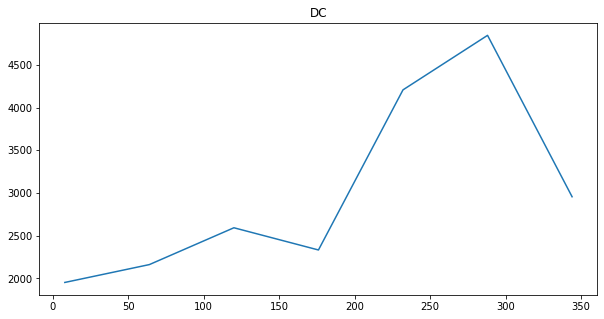

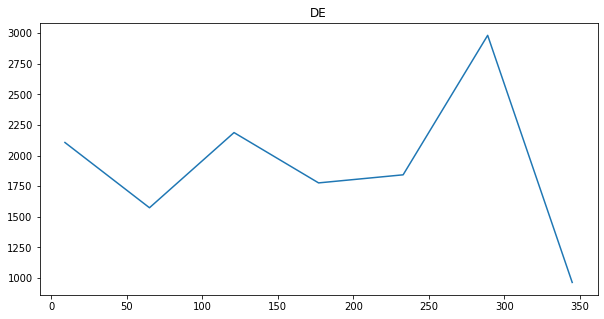

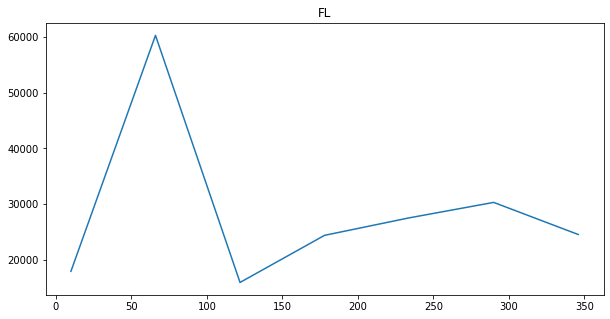

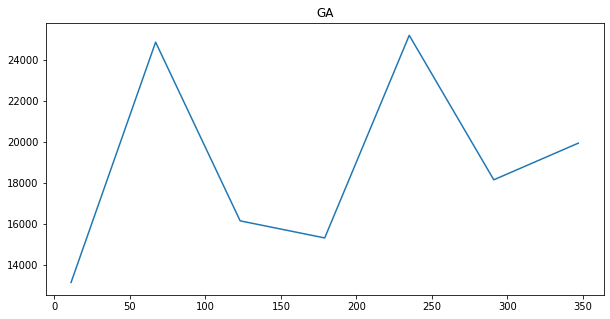

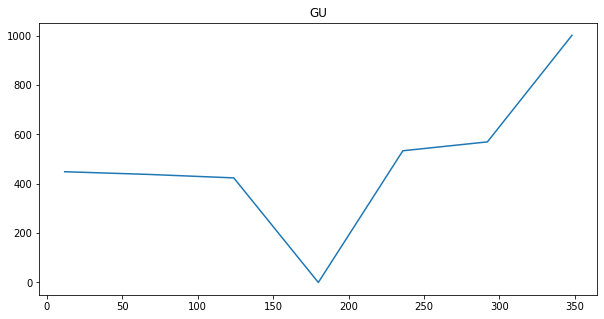

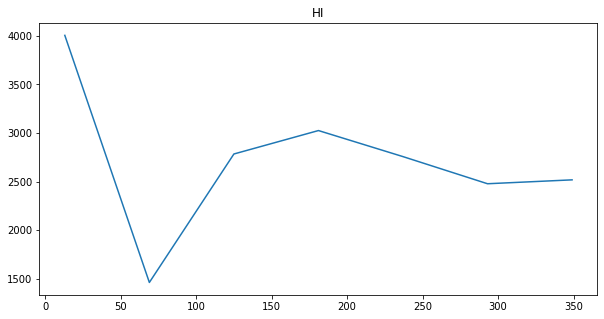

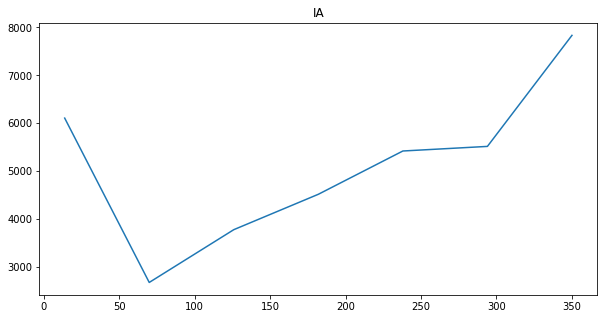

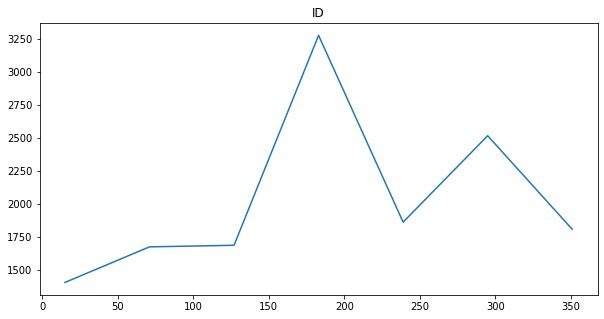

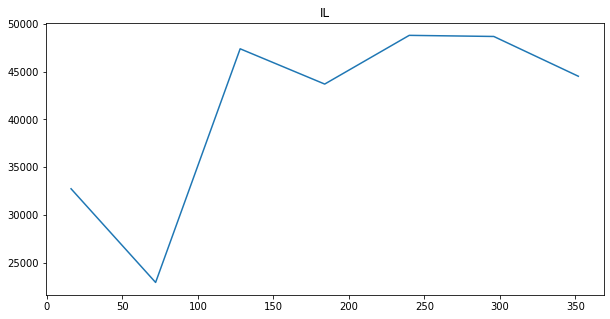

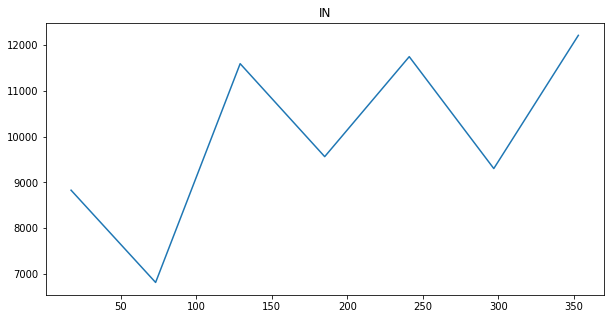

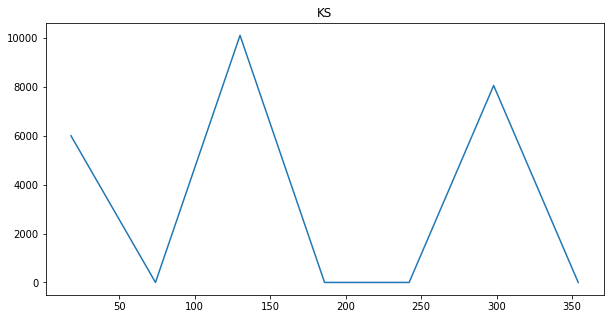

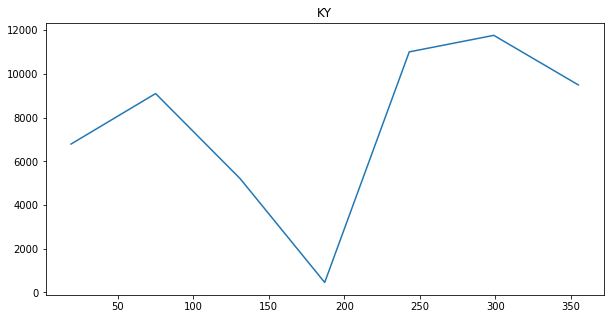

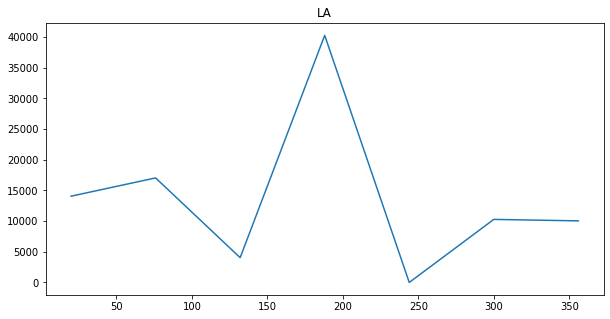

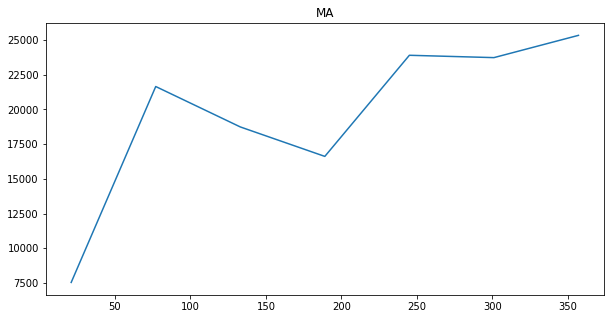

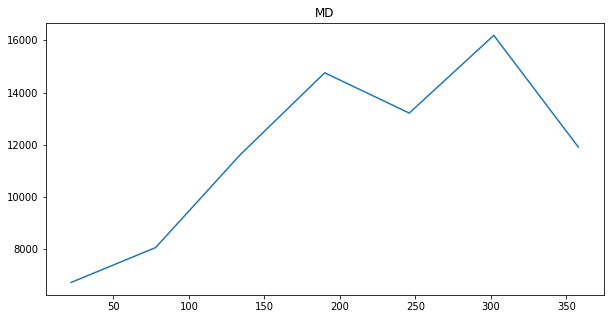

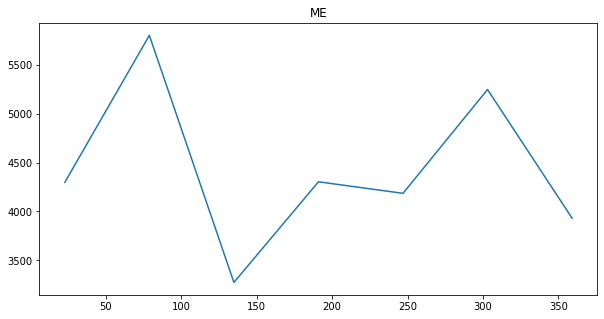

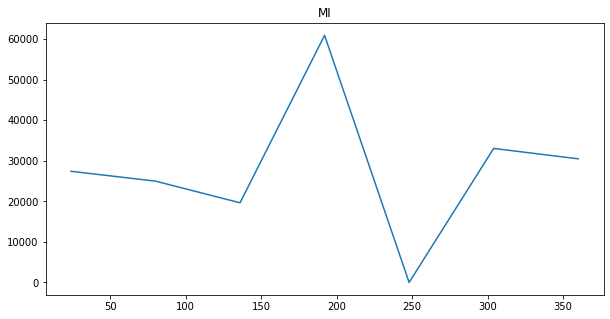

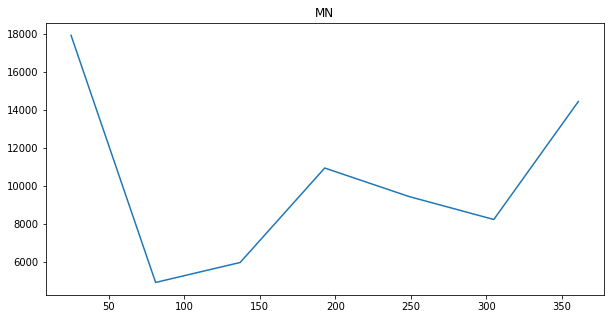

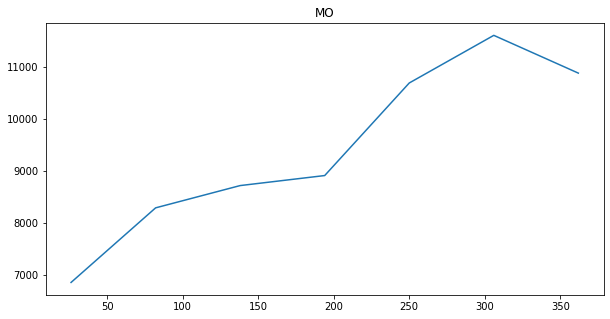

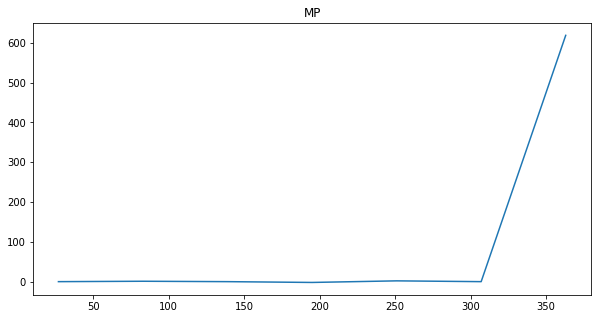

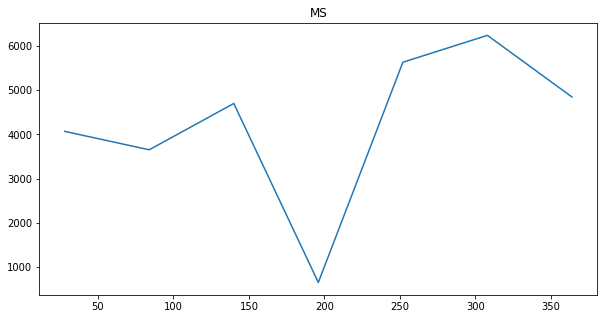

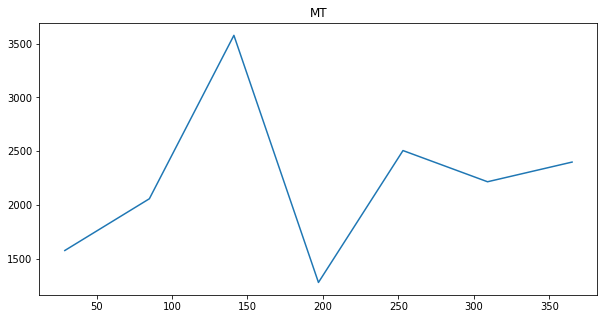

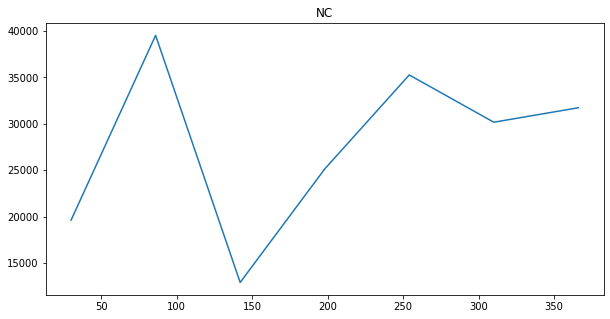

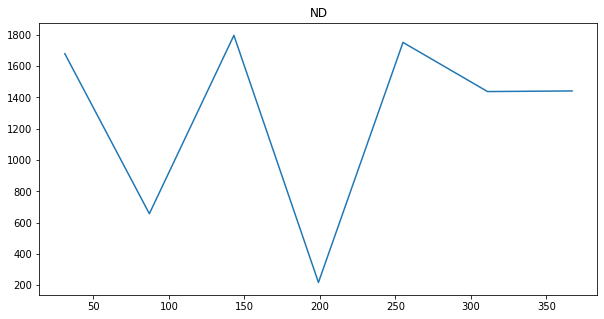

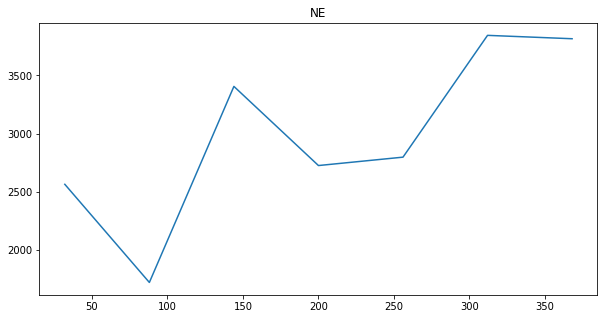

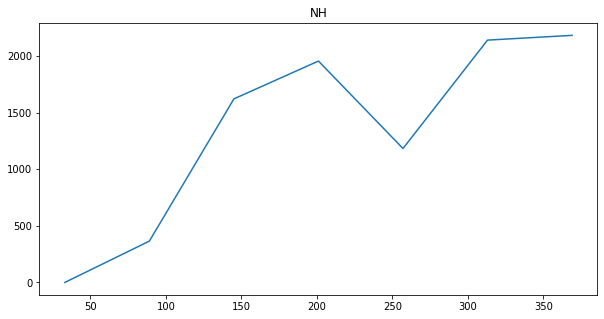

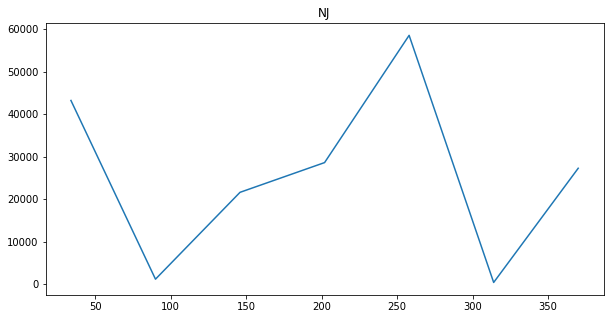

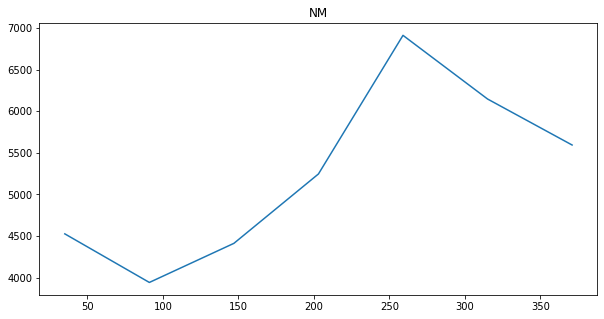

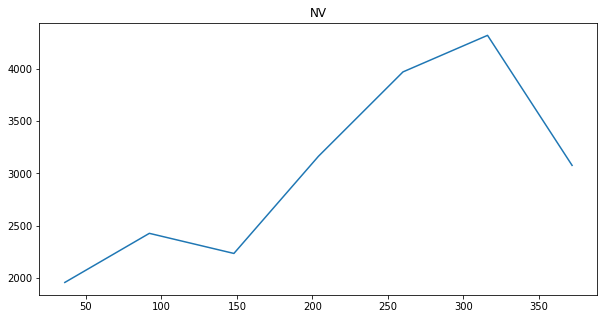

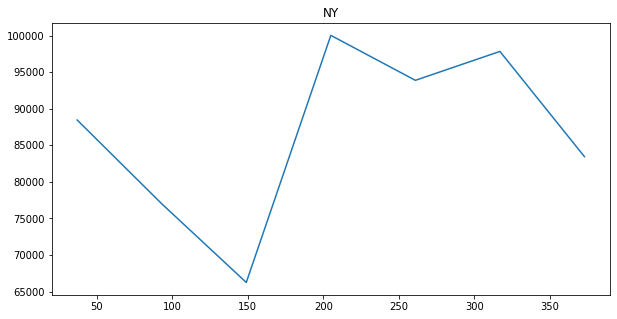

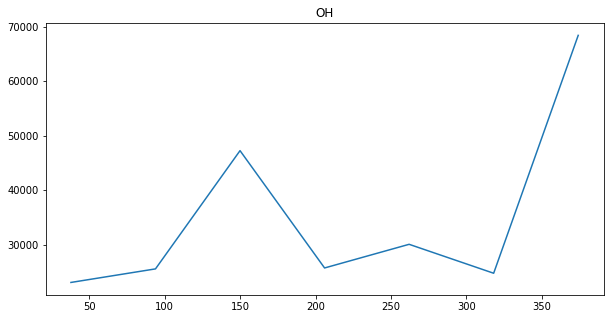

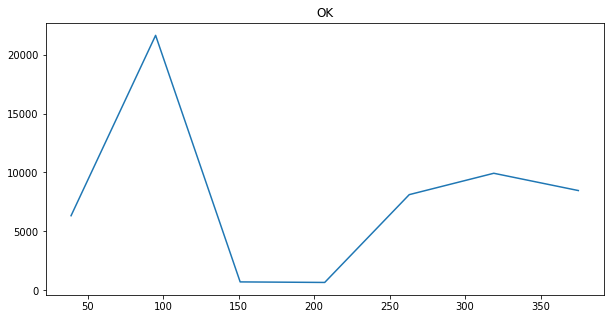

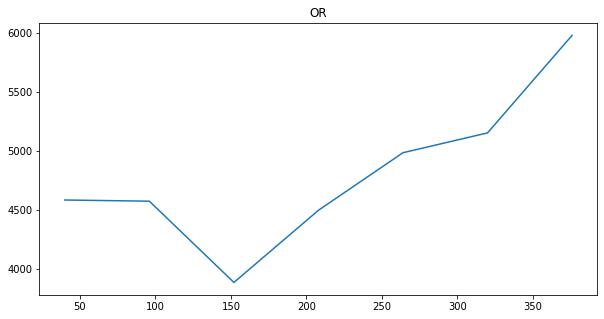

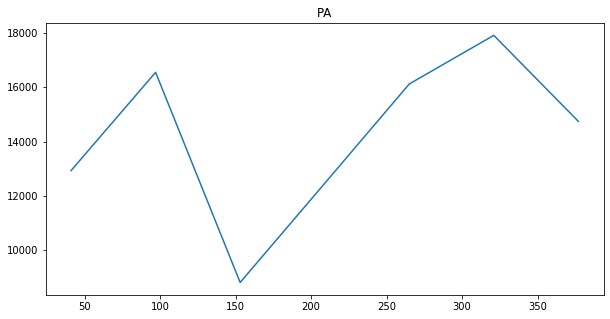

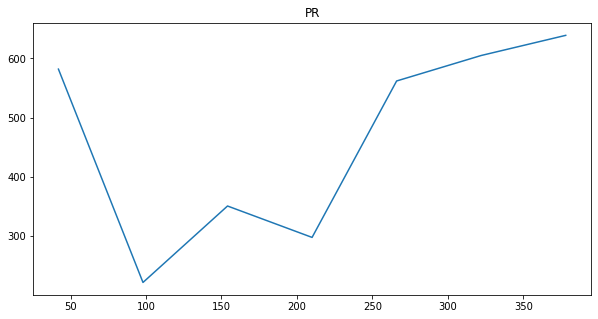

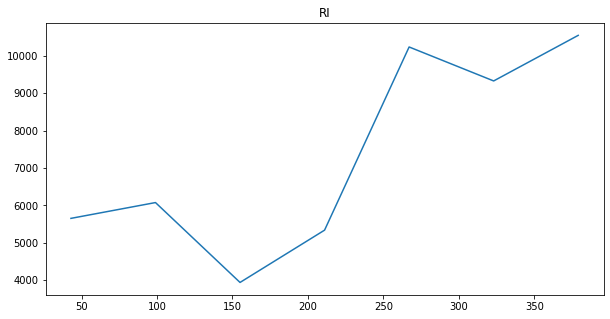

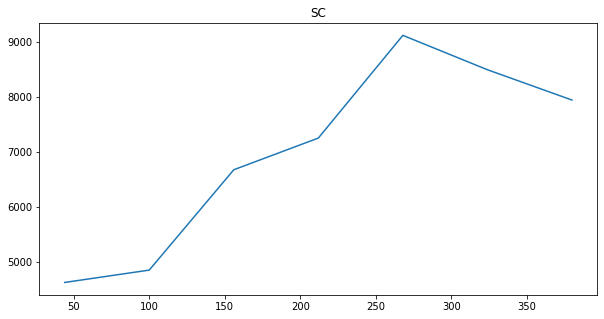

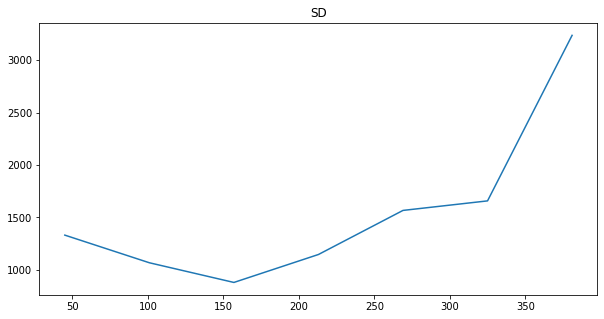

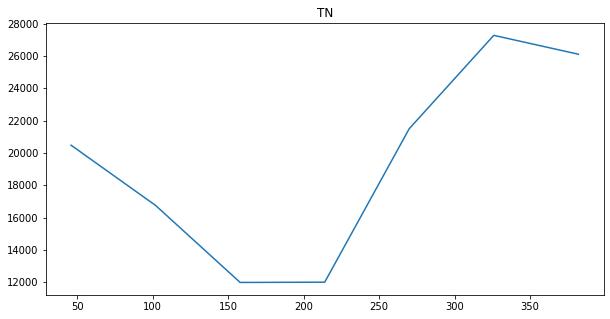

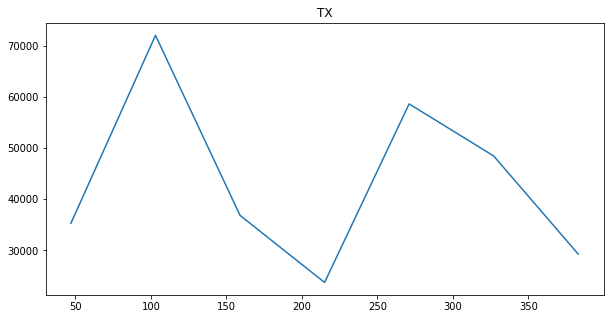

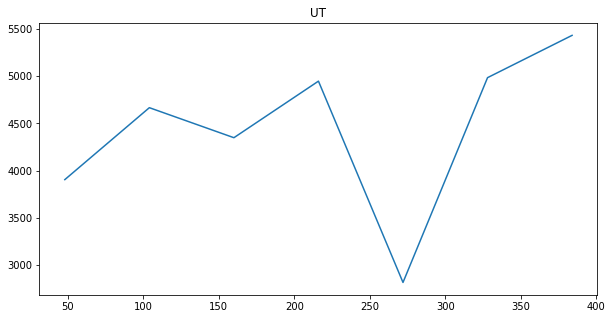

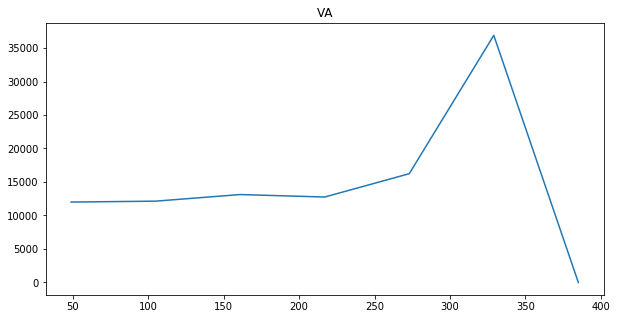

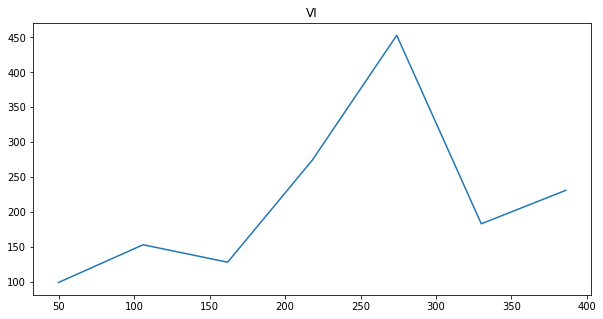

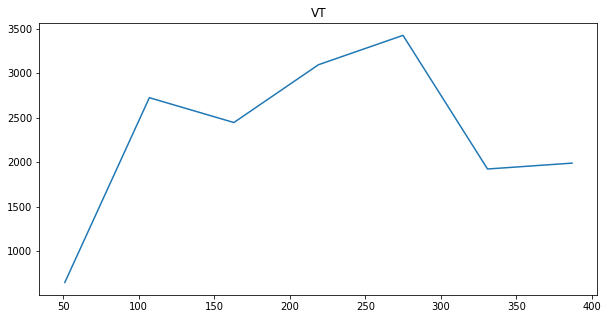

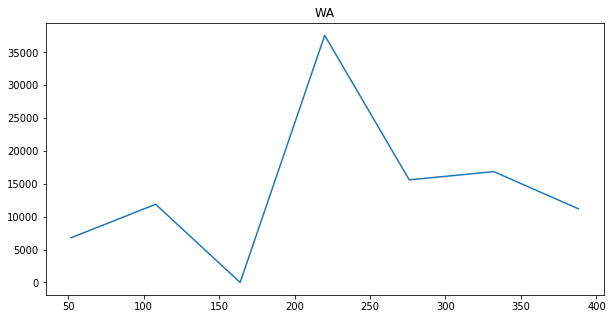

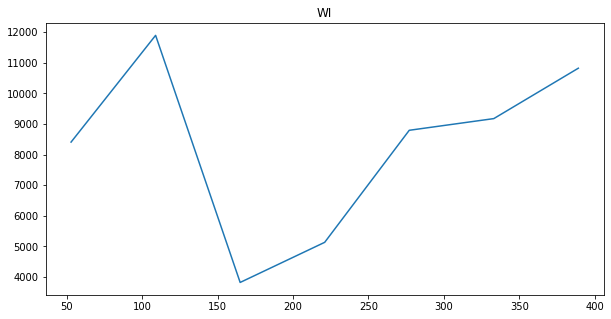

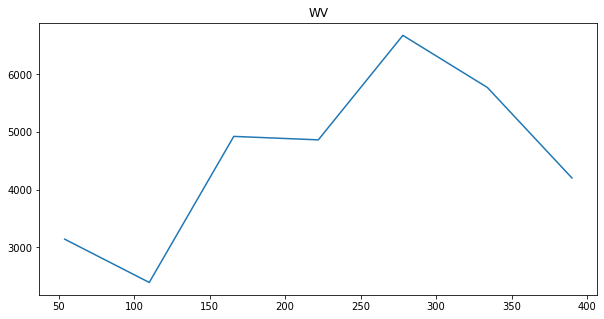

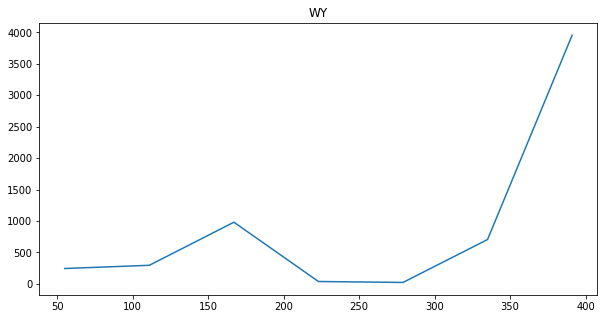

In [486]:
mpl.rcParams['figure.figsize'] = (10,5)
for g in past_week_groups.groups.keys():
    plt.plot(past_week_groups.get_group(g)['totalTestResultsIncrease'])
    plt.title(g)
    plt.show()

Find and Plot the correlations.
We do this to see if there is a correlation that is surprising.

In [488]:
fi=['state_pop', 'death per hundred thous', 'tests per thousand',
       'positive per thousand', 'positive increase per thousand',
       'test increase per thousand', 'death increase per hun thousand',
       'avg 7 day increase', 'avg 7 day increase per thousand']  

today[fi].corr()

,state_pop,death per hundred thous,tests per thousand,positive per thousand,positive increase per thousand,test increase per thousand,death increase per hun thousand,avg 7 day increase,avg 7 day increase per thousand
state_pop,1.000000,0.255954,0.089166,0.342909,-0.037087,0.126153,0.224351,0.877949,-0.050017
death per hundred thous,0.255954,1.000000,0.496064,0.571336,-0.367287,0.486223,0.013384,0.010686,-0.301714
tests per thousand,0.089166,0.496064,1.000000,0.307320,-0.079678,0.765085,-0.101995,-0.009327,-0.105355
positive per thousand,0.342909,0.571336,0.307320,1.000000,0.122736,0.216175,0.520819,0.415917,0.361356
positive increase per thousand,-0.037087,-0.367287,-0.079678,0.122736,1.000000,0.091569,0.305015,0.263236,0.704156
test increase per thousand,0.126153,0.486223,0.765085,0.216175,0.091569,1.000000,-0.148755,0.013813,0.036738
death increase per hun thousand,0.224351,0.013384,-0.101995,0.520819,0.305015,-0.148755,1.000000,0.412688,0.346830
avg 7 day increase,0.877949,0.010686,-0.009327,0.415917,0.263236,0.013813,0.412688,1.000000,0.273102
avg 7 day increase per thousand,-0.050017,-0.301714,-0.105355,0.361356,0.704156,0.036738,0.346830,0.273102,1.000000


Text(0.5, 1, 'Rolling Standard Deviation Heatmap of Correlations')

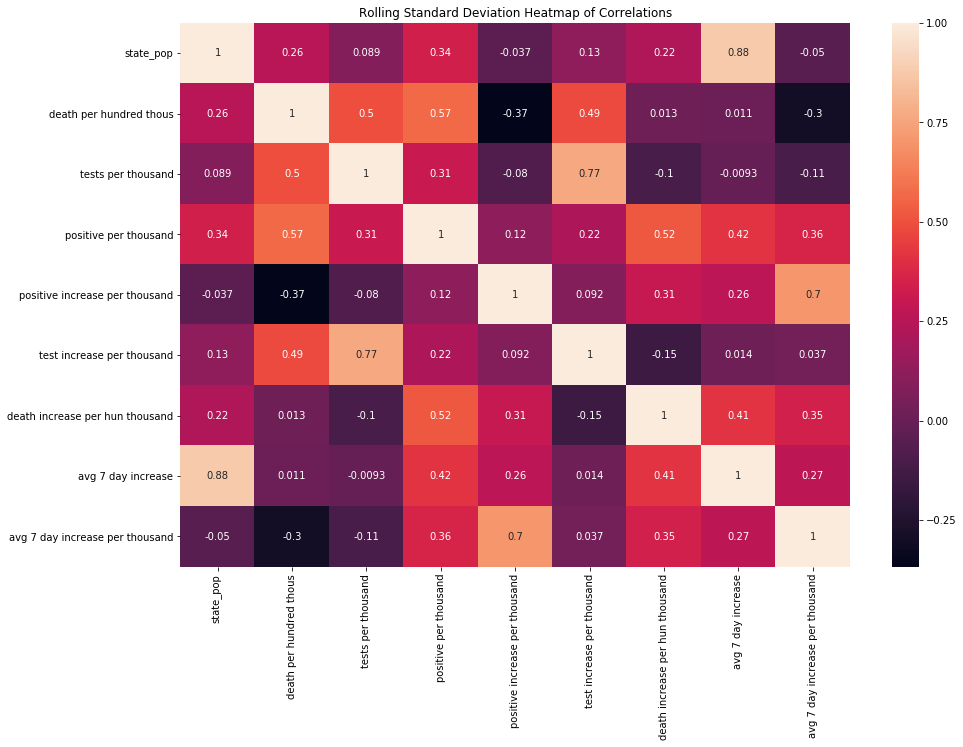

In [489]:
fig, ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(today[fi].corr(),annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.title('Rolling Standard Deviation Heatmap of Correlations')

Testing and State Population do not have a strong correlation which is not expected. 

    test per thousand and state population corr : 0.089
    test increase per thousand : 0.13

Average 7 day increase and State Population have a strong correlation  which is expected. (0.88)
